## <h1><center><font color=1E9199>Importing Libraries</font></center></h1>

In [1]:
# Basics libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# importing hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_excel(r"C:\Users\91730\OneDrive\Desktop\Projects - ExcelR\Clustering World Development - 3\World_development_mesurement.xlsx")
pd.set_option('display.max_columns',None)

In [3]:
data['Days to Start Business'].notna()

0       False
1       False
2       False
3       False
4       False
        ...  
2699    False
2700     True
2701     True
2702     True
2703    False
Name: Days to Start Business, Length: 2704, dtype: bool

In [4]:
data.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",175.0,0.006,0.8,0.033,81.0,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",310.0,0.010,0.5,0.112,80.0,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,792.0,0.013,0.5,0.164,78.0,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,83.0,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [5]:
df = data.copy()
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


## <h1><center><font color=1E9199>EDA</font></center></h1>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [7]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [8]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [9]:
df['Country'].value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

##### 208 Countries with each having 13 entries

In [10]:
df[df['Country'] == 'United Kingdom']

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
134,0.012,NaN,543662.0,United Kingdom,NaN,NaN,222940.0,"$1,493,628,385,535",0.070,"$1,761",NaN,0.006,0.3,0.060,80.0,75.0,0.7,1,0.190,0.652,0.158,58892514,0.787,"$29,978,000,000","$47,009,000,000"
342,0.011,NaN,550552.0,United Kingdom,NaN,NaN,223770.0,"$1,485,147,545,703",0.073,"$1,819",NaN,0.006,0.3,0.051,80.0,76.0,0.8,1,0.188,0.654,0.158,59119673,0.788,"$26,137,000,000","$46,410,000,000"
550,0.011,NaN,531939.0,United Kingdom,NaN,NaN,218306.0,"$1,620,900,779,377",0.076,"$2,065",NaN,0.005,0.6,0.040,81.0,76.0,0.8,1,0.186,0.656,0.158,59370479,0.790,"$27,819,000,000","$51,125,000,000"
758,0.012,NaN,540640.0,United Kingdom,13.0,NaN,222080.0,"$1,875,141,224,490",0.078,"$2,444",NaN,0.005,0.6,0.037,81.0,76.0,0.9,1,0.183,0.658,0.159,59647577,0.793,"$30,736,000,000","$58,627,000,000"
966,0.012,NaN,540409.0,United Kingdom,13.0,NaN,221558.0,"$2,220,820,974,770",0.080,"$2,955",NaN,0.005,0.7,0.044,81.0,77.0,1.0,1,0.181,0.660,0.159,59987905,0.796,"$37,166,000,000","$69,076,000,000"
1174,0.012,34.7%,541986.0,United Kingdom,13.0,NaN,222638.0,"$2,321,357,943,509",0.083,"$3,161",105.0,0.005,0.7,0.046,81.0,77.0,1.1,1,0.179,0.661,0.160,60401206,0.799,"$39,411,000,000","$72,993,000,000"
1382,0.012,34.6%,542041.0,United Kingdom,13.0,NaN,218961.0,"$2,483,010,316,107",0.084,"$3,423",105.0,0.005,0.7,0.046,81.0,77.0,1.2,1,0.178,0.662,0.160,60846820,0.802,"$43,803,000,000","$77,674,000,000"
1590,0.013,34.5%,528906.0,United Kingdom,13.0,NaN,210993.0,"$2,857,082,734,449",0.085,"$3,953",105.0,0.005,0.8,0.055,82.0,77.0,1.2,1,0.177,0.662,0.161,61322463,0.805,"$48,193,000,000","$86,747,000,000"
1798,0.013,34.2%,522467.0,United Kingdom,13.0,NaN,208209.0,"$2,687,795,428,485",0.090,"$3,875",105.0,0.005,0.8,0.046,82.0,78.0,1.2,1,0.176,0.661,0.162,61806995,0.808,"$46,285,000,000","$83,584,000,000"
2006,0.013,34.9%,475108.0,United Kingdom,12.0,NaN,196485.0,"$2,208,001,972,524",0.099,"$3,512",110.0,0.005,0.8,0.006,82.0,78.0,1.2,1,0.176,0.660,0.164,62276270,0.810,"$38,564,000,000","$61,133,000,000"


#### What are in those 13 entries ?

Records for 13 years from 2000 - 2013

https://data.worldbank.org/indicator/FR.INR.LEND?locations=GB

In [11]:
df[df['Country'] == 'Virgin Islands (U.S.)']

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
207,0.014,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,80.0,73.0,0.3,1,0.259,0.655,0.086,108639,0.926,"$1,206,000,000",NaN
415,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,81.0,75.0,0.4,1,0.253,0.658,0.089,108386,0.928,"$1,234,000,000",NaN
623,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,81.0,75.0,0.4,1,0.246,0.662,0.093,108208,0.930,"$1,195,000,000",NaN
831,0.014,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,81.0,75.0,0.5,1,0.238,0.666,0.096,108085,0.933,"$1,257,000,000",NaN
1039,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,0.6,1,0.231,0.669,0.101,107950,0.935,"$1,356,000,000",NaN
1247,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,0.7,1,0.224,0.670,0.106,107863,0.937,"$1,432,000,000",NaN
1455,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.219,0.670,0.111,107700,0.939,"$1,467,000,000",NaN
1663,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.214,0.669,0.117,107423,0.941,"$1,512,000,000",NaN
1871,0.012,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.211,0.666,0.123,107091,0.942,"$1,157,000,000",NaN
2079,0.012,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.208,0.662,0.130,106707,0.944,"$1,021,000,000",NaN


In [12]:
df.shape

(2704, 25)

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [15]:
df.isnull().sum().sum()

11740

1.) There are 11740 overall null values in our Dataset.

2.) There are No Duplicate values in our Dataset.

3.) Columns - Country ; Number of Records and Population Total are the only columns with 0 null values.

## <h1><center><font color=1E9199>Dealing with Null Values</font></center></h1>

#### When we have such a large number of missing values present in our data, we have 2 options.

1) Deletion : Deletion of rows (if you have large volume of data)
              
              Deletion of columns (if > 45% of data is null)

2) Imputation : for numeric column -- use mean/median/mode
                
                for categorical columns -- use mode or ration

### 1.) Deletion : Deletion of rows (if you have large volume of data)
              
              Deletion of columns (if > 45% of data is null)

In [16]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Ease of Business,2519,93.158284
Hours to do Tax,1288,47.633136
Business Tax Rate,1281,47.374260
Days to Start Business,986,36.464497
Energy Usage,919,33.986686
Lending Interest,824,30.473373
CO2 Emissions,579,21.412722
Tourism Outbound,471,17.418639
Tourism Inbound,368,13.609467
Health Exp % GDP,309,11.427515


### Dropping columns which have null values more than 45 %

In [17]:
# we will delete columns having more than 45% entries as null
list = []
for col in df.columns:
    if df[col].isna().sum() > df.shape[0] * 0.45 :
        list.append(col)
list 

['Business Tax Rate', 'Ease of Business', 'Hours to do Tax']

### Number of Records = Dropping columns not having any contribution towards Clustering.

In [18]:
column_to_drop = df[['Ease of Business','Hours to do Tax','Business Tax Rate','Number of Records']]

In [19]:
column_to_drop.head()

,Ease of Business,Hours to do Tax,Business Tax Rate,Number of Records
0,NaN,NaN,NaN,1
1,NaN,NaN,NaN,1
2,NaN,NaN,NaN,1
3,NaN,NaN,NaN,1
4,NaN,NaN,NaN,1


In [20]:
df = df.drop(column_to_drop,axis=1)

In [21]:
df.shape

(2704, 21)

In [22]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,986,36.464497
Energy Usage,919,33.986686
Lending Interest,824,30.473373
CO2 Emissions,579,21.412722
Tourism Outbound,471,17.418639
Tourism Inbound,368,13.609467
Health Exp % GDP,309,11.427515
Health Exp/Capita,309,11.427515
Infant Mortality Rate,260,9.615385
Population 0-14,220,8.136095


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  1718 non-null   float64
 4   Energy Usage            1785 non-null   float64
 5   GDP                     2494 non-null   object 
 6   Health Exp % GDP        2395 non-null   float64
 7   Health Exp/Capita       2395 non-null   object 
 8   Infant Mortality Rate   2444 non-null   float64
 9   Internet Usage          2531 non-null   float64
 10  Lending Interest        1880 non-null   float64
 11  Life Expectancy Female  2568 non-null   float64
 12  Life Expectancy Male    2568 non-null   float64
 13  Mobile Phone Usage      2537 non-null   float64
 14  Population 0-14         2484 non-null   

### Identify categorical and numerical columns

In [24]:
categorical_cols = []
numerical_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)


In [25]:
print('Categorical columns:', categorical_cols)

Categorical columns: ['Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


##### GDP , Health Exp/Capita , Tourism Inbound , Tourism Outbound These Column are not Categorical They are Numerical By nature coz Numbers are involved in it, so lets convert them to numeric form by doing some string operation.

In [26]:
# removing $ sign which gives these columns non numeric appearance
df['GDP'] = df['GDP'].str.replace('$', '')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$', '')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace('$', '') 
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace('$', '')  


In [27]:
# removing , sign which gives these columns non numeric appearance & type casting
df['GDP'] = df['GDP'].str.replace(',', '').astype('Int64') 
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',', '').astype('Int64')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace(',', '').astype('Int64')
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace(',', '').astype('Int64')

In [28]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('categorical_features:', categorical_features)  

# 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound' converted into int

categorical_features: ['Country']


In [29]:
print('Numerical columns:', numerical_cols)

Numerical columns: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp % GDP', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban']


### Under numeric features there are 2 types of features ie. discrete and categorical

In [30]:
discrete_features = [feature for feature in numerical_cols if len(df[feature].unique())<25]
print('discrete features:', discrete_features, '\n')

discrete features: ['Internet Usage'] 



In [31]:
continuous_features = [feature for feature in numerical_cols if feature not in discrete_features]
print('continuous features:', continuous_features, '\n') 

continuous features: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp % GDP', 'Infant Mortality Rate', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban'] 



### Clustering is based on Countries so lets analyse Country Columns

In [32]:
for country in df.Country.unique():
    df_country_name = df[df['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            print(country, '----{column no:}', i+1) 
            
# Eritrea has column No. 11 and 12 are totally null

Benin ----{column no:} 11
Burkina Faso ----{column no:} 5
Burkina Faso ----{column no:} 11
Burundi ----{column no:} 5
Central African Republic ----{column no:} 5
Chad ----{column no:} 5
Cote d'Ivoire ----{column no:} 11
Eritrea ----{column no:} 11
Eritrea ----{column no:} 21
Ghana ----{column no:} 11
Guinea ----{column no:} 5
Guinea-Bissau ----{column no:} 11
Liberia ----{column no:} 5
Madagascar ----{column no:} 5
Malawi ----{column no:} 5
Mali ----{column no:} 5
Mali ----{column no:} 11
Mauritania ----{column no:} 5
Mauritania ----{column no:} 20
Mauritania ----{column no:} 21
Niger ----{column no:} 5
Niger ----{column no:} 11
Rwanda ----{column no:} 5
Senegal ----{column no:} 11
Sierra Leone ----{column no:} 5
Somalia ----{column no:} 4
Somalia ----{column no:} 5
Somalia ----{column no:} 6
Somalia ----{column no:} 7
Somalia ----{column no:} 8
Somalia ----{column no:} 11
Somalia ----{column no:} 20
Somalia ----{column no:} 21
South Sudan ----{column no:} 2
South Sudan ----{column no:

In [33]:
list = []
for country in df.Country.unique():
    df_country_name = df[df['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            list.append(country)

In [34]:
null_col_country = pd.DataFrame() 
null_col_country['Country'] = list 

null_col_country['Country'].value_counts()  

#Turks and Caicos Islands  has 16 out of 21 columns totally null

American Samoa               16
Turks and Caicos Islands     16
St. Martin (French part)     16
Isle of Man                  14
Sint Maarten (Dutch part)    13
                             ..
Luxembourg                    1
Senegal                       1
Portugal                      1
Rwanda                        1
Benin                         1
Name: Country, Length: 69, dtype: int64

##### We observe that entries for big countries are properly maintained where the most of the null entries are associated with small countries like Turks and Caicos Islands , Virgin Islands (U.S) , Marshall Islands

American Samoa - 45,035 Population
(https://www.worlddata.info/oceania/american-samoa/index.php#:~:text=The%20dwarf%20state%20has%20a,area%20and%20ranked%20219th%20worldwide)

Turks and Caicos Islands - 44,542 Population
(https://en.wikipedia.org/wiki/Turks_and_Caicos_Islands)


St. Martin (French part) - 73,777 Population
(https://en.wikipedia.org/wiki/Saint_Martin_(island))

##### Hence, from the above observe we can see that there are Columns in our datasets with with no values, So Deleting Records of those countries having more than 1/4th columns totally blank.

In [35]:
df.head()

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,54790058957,0.035,60,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,9542.0,Angola,NaN,7499.0,9129594819,0.034,22,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,4276.0,Botswana,NaN,1836.0,5788311645,0.047,152,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,1041.0,Burkina Faso,NaN,NaN,2610959139,0.051,12,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000


In [36]:
#deleting countries having more than 1/4th rows totally blank
list = []
for i in range (0,len(null_col_country['Country'].value_counts())):
    if null_col_country['Country'].value_counts()[i] >= 6:
        list.append(null_col_country['Country'].value_counts().index[i])
        
list 
#these are countries having more than 6 columns as totally blank
#deleting all these contries

['American Samoa',
 'Turks and Caicos Islands',
 'St. Martin (French part)',
 'Isle of Man',
 'Sint Maarten (Dutch part)',
 'Cayman Islands',
 'Liechtenstein',
 'Monaco',
 'Greenland',
 'Faeroe Islands',
 'Guam',
 'Andorra',
 'Kosovo',
 'Virgin Islands (U.S.)',
 'Bermuda',
 'Curacao',
 'Korea, Dem. Rep.',
 'Somalia',
 'San Marino',
 'French Polynesia',
 'New Caledonia',
 'South Sudan',
 'Puerto Rico']

In [37]:
null_col_country.value_counts().sum()

313

In [38]:
# This are the index Number of those columns which have to removed.
list1 = []

for i in range(0, len(df)):
    for j in range (0,len(list)):
        if df['Country'][i] == list[j]:
            list1.append(i)            

In [39]:
df.drop(list1,inplace = True)

In [40]:
df.shape

(2405, 21)

##### 299 rows were removed 

In [41]:
df = df.reset_index()

In [42]:
df.head()

,index,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0,0.020,87931.0,Algeria,NaN,26998.0,54790058957,0.035,60,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,1,0.050,9542.0,Angola,NaN,7499.0,9129594819,0.034,22,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,2,0.043,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,3,0.027,4276.0,Botswana,NaN,1836.0,5788311645,0.047,152,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,4,0.046,1041.0,Burkina Faso,NaN,NaN,2610959139,0.051,12,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000


In [43]:
df.drop(columns=['index'],inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2374 non-null   float64
 1   CO2 Emissions           2015 non-null   float64
 2   Country                 2405 non-null   object 
 3   Days to Start Business  1702 non-null   float64
 4   Energy Usage            1761 non-null   float64
 5   GDP                     2380 non-null   Int64  
 6   Health Exp % GDP        2351 non-null   float64
 7   Health Exp/Capita       2351 non-null   Int64  
 8   Infant Mortality Rate   2366 non-null   float64
 9   Internet Usage          2357 non-null   float64
 10  Lending Interest        1859 non-null   float64
 11  Life Expectancy Female  2367 non-null   float64
 12  Life Expectancy Male    2367 non-null   float64
 13  Mobile Phone Usage      2356 non-null   float64
 14  Population 0-14         2366 non-null   

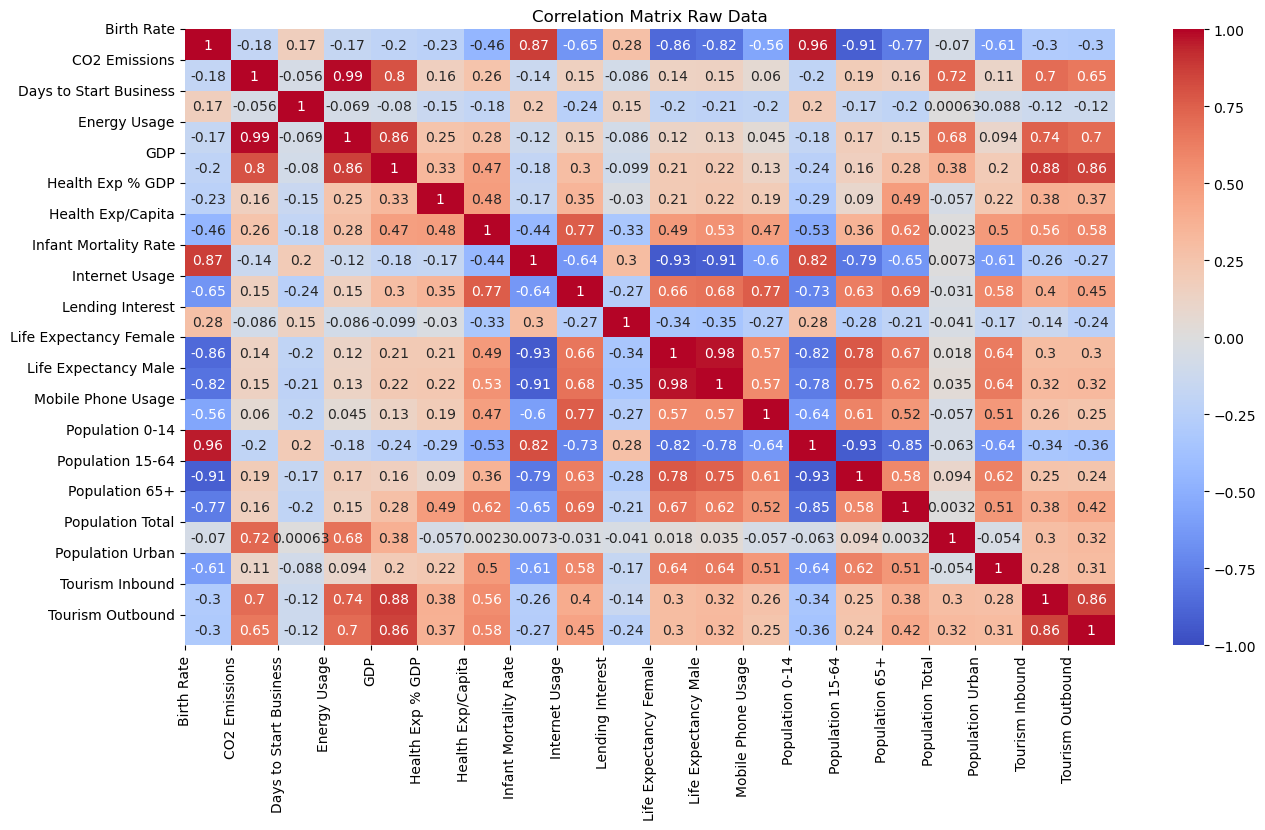

In [45]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set up the heatmap and figure size
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the x- and y-axis labels using the column names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Add a title and display the plot
plt.title('Correlation Matrix Raw Data')
plt.show()

In [46]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the highly correlated columns
highly_correlated = set()
for col in corr_matrix:
    correlated_cols = corr_matrix.index[corr_matrix[col] > 0.8]
    for c in correlated_cols:
        if c != col:
            highly_correlated.add((col, c))

# Print the result
print(f"The following columns are highly correlated:\n{highly_correlated}")

The following columns are highly correlated:
{('Population 0-14', 'Infant Mortality Rate'), ('GDP', 'Tourism Inbound'), ('GDP', 'CO2 Emissions'), ('Tourism Outbound', 'Tourism Inbound'), ('Population 0-14', 'Birth Rate'), ('Tourism Outbound', 'GDP'), ('Life Expectancy Female', 'Life Expectancy Male'), ('Infant Mortality Rate', 'Population 0-14'), ('CO2 Emissions', 'Energy Usage'), ('CO2 Emissions', 'GDP'), ('Infant Mortality Rate', 'Birth Rate'), ('Tourism Inbound', 'Tourism Outbound'), ('Birth Rate', 'Population 0-14'), ('Life Expectancy Male', 'Life Expectancy Female'), ('GDP', 'Tourism Outbound'), ('Energy Usage', 'CO2 Emissions'), ('Birth Rate', 'Infant Mortality Rate'), ('Energy Usage', 'GDP'), ('Tourism Inbound', 'GDP'), ('GDP', 'Energy Usage')}


In [47]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,703,29.230769
Energy Usage,644,26.777547
Lending Interest,546,22.702703
CO2 Emissions,390,16.216216
Tourism Outbound,246,10.228690
Tourism Inbound,169,7.027027
Health Exp % GDP,54,2.245322
Health Exp/Capita,54,2.245322
Mobile Phone Usage,49,2.037422
Internet Usage,48,1.995842


In [48]:
LI = df.set_index('Country')[['Lending Interest']].isnull().groupby('Country').sum().loc[lambda x: x['Lending Interest'] == 13]

In [49]:
LI

,Lending Interest
Country,
Austria,13
Benin,13
Burkina Faso,13
Cambodia,13
Cote d'Ivoire,13
Cuba,13
Eritrea,13
Ghana,13
Guinea-Bissau,13


In [50]:
LI.value_counts()

Lending Interest
13                  24
dtype: int64

In [51]:
df[df['Country'] == 'Benin']

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2,0.043,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
187,0.042,1738.0,Benin,NaN,2109.0,2499269391,0.047,16,0.088,0.0,NaN,57.0,54.0,0.0,0.453,0.518,0.029,7174911,0.387,86000000,48000000
372,0.042,2054.0,Benin,NaN,2262.0,2807657386,0.043,16,0.085,0.0,NaN,58.0,54.0,0.0,0.451,0.520,0.028,7414744,0.390,95000000,49000000
557,0.041,2321.0,Benin,32.0,2386.0,3557229702,0.046,21,0.082,0.0,NaN,58.0,55.0,0.0,0.449,0.522,0.028,7665681,0.393,108000000,53000000
742,0.041,2512.0,Benin,31.0,2491.0,4050869968,0.046,23,0.078,0.0,NaN,58.0,55.0,0.1,0.447,0.525,0.028,7922796,0.396,121000000,59000000
927,0.040,2398.0,Benin,31.0,2499.0,4358015993,0.047,25,0.075,0.0,NaN,59.0,56.0,0.1,0.445,0.527,0.028,8182362,0.400,108000000,58000000
1112,0.040,3876.0,Benin,31.0,2949.0,4705087452,0.048,26,0.072,0.0,NaN,59.0,56.0,0.1,0.443,0.529,0.028,8443671,0.403,122000000,71000000
1297,0.039,4499.0,Benin,31.0,3206.0,5506275948,0.045,29,0.069,0.0,NaN,59.0,57.0,0.2,0.441,0.531,0.028,8707490,0.407,206000000,107000000
1482,0.039,4492.0,Benin,31.0,3278.0,6633561835,0.042,31,0.066,0.0,NaN,60.0,57.0,0.4,0.439,0.533,0.029,8973293,0.411,236000000,102000000
1667,0.038,4756.0,Benin,31.0,3439.0,6585134688,0.044,32,0.064,0.0,NaN,60.0,57.0,0.5,0.436,0.535,0.029,9240783,0.415,131000000,88000000


### Inserting Lending Rates from Online sources


#### Benin

In [52]:
list = [0.08,0.047,0.048,0.05,0.050, 
        0.051,0.052,0.053,0.069,0.068,0.67,0.065,0.063] 
# from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Benin':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
    
        

#### Burkina Faso

In [53]:
list = [0.089,0.047,0.048,0.05,0.05,0.051,0.053,0.052,0.053,0.068,0.052,0.065,0.067] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Burkina Faso':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Eritrea

In [54]:
# The interest rate varies from 9-12% per annum
list = np.random.uniform(0.09,0.12, 13) 

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] == "Eritrea" :
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Ghana

In [55]:
#https://www.bog.gov.gh/economic-data/interest-rates/
list = [0.27,0.27,0.245,0.215,0.185,0.155,0.125,0.135,0.17,0.18,0.135,0.125,0.15]

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] == "Ghana" :
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Guinea Bissau

In [56]:
list = [0.104,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Guinea-Bissau':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Mali

In [57]:
list = [0.087,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Mali':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Niger

In [58]:
list = [0.108,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Niger':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Senegal

In [59]:
list = [0.07,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Senegal':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Togo

In [60]:
list = [0.088,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Togo':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Uganda

In [61]:
list = [0.229,0.227,0.191,0.189,0.206,0.196,0.187,0.191,0.205,0.21,0.202,0.218,0.262] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Uganda':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Zimbabwe

In [62]:
list = [0.116,0.097,0.095,0.085,0.071,0.069,0.071,0.162,0.33,0.455,
        np.nan, np.nan, np.nan] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Zimbabwe':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Afghanistan

In [63]:
list = [0.18,0.181,0.149,0.15,0.156,0.151,0.15,0.151,0.15,0.15,0.15,0.148,np.nan] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Afghanistan':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Kazakhstan

In [64]:
#https://www.focus-economics.com/country-indicator/kazakhstan/interest-rate
list = [0.24,0.24,0.24,0.08,0.085,0.09,0.10,0.12,0.115,0.08,0.08,0.825,0.07] 

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Kazakhstan':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Tunisia -------

In [65]:
list = [0.0575,0.0575,0.0575,0.05,0.05,0.05,0.0525,0.0525,0.0525,0.045,0.045,0.035,0.040] 
#https://www.focus-economics.com/country-indicator/tunisia/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Tunisia':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Austria

In [66]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/austria/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Austria':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Luxmebourg

In [67]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/luxembourg/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Luxembourg':
      
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Portugal

In [68]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/portugal/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Portugal':
       
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Turkey

In [69]:
list = [0.80,0.55,0.45,0.25,0.15,0.10,0.15,0.15,0.15,0.05,0.05,0.05,0.05] 
#https://www.focus-economics.com/country-indicator/turkey/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Turkey':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Saudi arabia

In [70]:
list = [0.07,0.03,0.02,0.015,0.025,0.045,0.05,0.055,0.025,0.02,0.02,0.02,0.02] 
#https://www.focus-economics.com/country-indicator/saudi-arabia/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Saudi Arabia':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Cuba

In [71]:
list = [0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225] 

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Cuba':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Cote d'Ivoire

In [72]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.07,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Cote d'Ivoire":
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Sudan

In [73]:
list = [np.nan,np.nan,np.nan, 0.17,0.18,0.11,0.11,0.12,0.12,0.12,0.12,0.10, 0.11]
#https://take-profit.org/en/statistics/interest-rate/sudan
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Sudan":
       
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Uzbekistan

In [74]:
list = [0.28, 0.24,0.30,0.24,0.20,0.16,0.16,0.14,0.14,0.14,0.14,0.12,0.12]
#Central bank of Uzbekistan  -- https://cbu.uz/en/monetary-policy/refinancing-rate/levels/
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Uzbekistan":
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Turkmenistan

In [75]:
list = [np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan, 0.019, 0.019, 0.020, 0.0125, 0.0125, 0.125]
# Asian development bank -- adb.org/statistics
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Turkmenistan":
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        


#### Cambodia

In [76]:
list = [0.279,0.267,0.219,0.204,0.173, np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan,np.nan]
# https://tradingeconomics.com/cambodia/interest-rate
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Cambodia":
       
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

In [77]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,703,29.230769
Energy Usage,644,26.777547
CO2 Emissions,390,16.216216
Lending Interest,281,11.683992
Tourism Outbound,246,10.228690
Tourism Inbound,169,7.027027
Health Exp % GDP,54,2.245322
Health Exp/Capita,54,2.245322
Mobile Phone Usage,49,2.037422
Internet Usage,48,1.995842


In [78]:
df.groupby('Country')['GDP'].apply(lambda x: x.isnull().any()).sum() == 13

False

### Imputing Energy Usage with Simple Linear Regression

We lack online resources to insert accurate data of energy usage

##### we take predictor CO2 emission to predict missing values of Energy usage

In [79]:
df.corr()['Energy Usage'].sort_values(ascending=False)[0:3]

Energy Usage     1.000000
CO2 Emissions    0.988724
GDP              0.860967
Name: Energy Usage, dtype: float64

<AxesSubplot: xlabel='CO2 Emissions', ylabel='Energy Usage'>

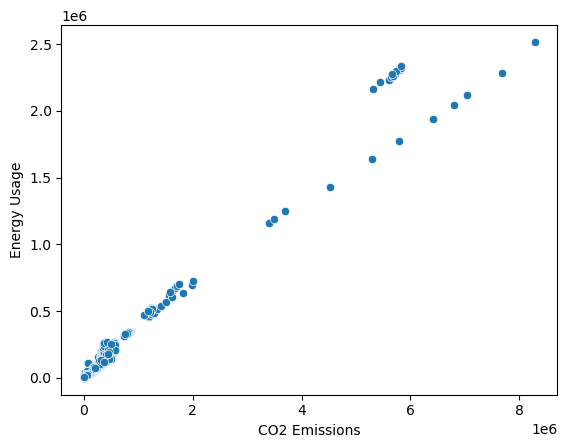

In [80]:
sns.scatterplot(df['CO2 Emissions'] , df['Energy Usage'])
#almost perfectly linear relation

##### Our approach involves addressing a discrepancy between the CO2 values in the train and test datasets. Specifically, the CO2 values in the train dataset are significantly larger than those in the test dataset. This discrepancy can lead to inconsistencies in model predictions, as the model is trained on large values and tested on small ones. To mitigate this issue, we slice the train dataset in a way that ensures that both the train and test datasets contain CO2 values within the same range. 

##### For example, if the test data contains CO2 values in the hundreds, we will trim the train dataset to only include CO2 values in the hundreds and remove values in the thousands and lakhs.

#### -------

In [81]:
df_eu = df[[ 'CO2 Emissions', 'Energy Usage']]   
df_eu.head() # only 2 columns 

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
4,1041.0,NaN


### All non null values for y (energy usage) 

In [82]:
df_eu_train = df_eu[np.isfinite(df_eu['Energy Usage'])]
print('Shape after removing null values for energy usage:', df_eu_train.shape)


Shape after removing null values for energy usage: (1761, 2)


### All non null values for x(CO2 Emissions)

In [83]:
df_eu_train.dropna(axis=0, inplace=True)
print('Shape after removing null values for CO2 Emissions:', df_eu_train.shape)  

Shape after removing null values for CO2 Emissions: (1584, 2)


In [84]:
df_eu_train.head()

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
6,3432.0,6310.0


In [85]:
df_eu_test = df_eu[df_eu['Energy Usage'].isna()]
print('Shape after keeping only null values of Energy Usage', df_eu_test.shape)

df_eu_test.dropna(subset=['CO2 Emissions'], inplace=True) 
print('Shape after removing null values of CO2 Emissions', df_eu_test.shape)  

Shape after keeping only null values of Energy Usage (644, 2)
Shape after removing null values of CO2 Emissions (431, 2)


In [86]:
df_eu_test.head()

,CO2 Emissions,Energy Usage
4,1041.0,NaN
5,301.0,NaN
7,268.0,NaN
8,176.0,NaN
9,84.0,NaN


### Finding the Minimum and Maximum Range Between CO2 Emission 

In [87]:
df_eu_test['CO2 Emissions'].min() ,df_eu_test['CO2 Emissions'].max()

(18.0, 8236.0)

### Finding out the Outliners in it CO2 Emission using Boxplot

<AxesSubplot: xlabel='CO2 Emissions'>

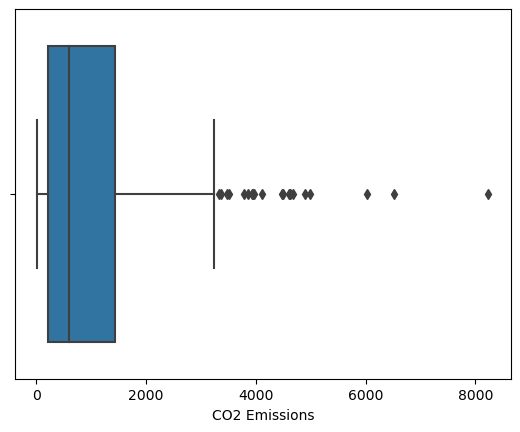

In [88]:
sns.boxplot(df_eu_test['CO2 Emissions'])

### Removing Outliner's

In [89]:
Q1,Q3 = np.percentile(df_eu_test['CO2 Emissions'],[25,75])
IQR = Q3 - Q1
Upper_Q = Q3 + 1.5*IQR
Lower_Q = Q1 - 1.5*IQR
Price_outliners = df_eu_test['CO2 Emissions'][(df_eu_test['CO2 Emissions'] > Upper_Q) | (df_eu_test['CO2 Emissions'] < Lower_Q)]
Price_outliners.count()

21

##### From the Boxplot we can see that the outliners are above 3800 value but still there are other which are not widely seprated from each so gonna consider it as a group as above 5000 value we will remove it? Because the values are widely seperated. 

In [90]:
df_eu_test[df_eu_test['CO2 Emissions']> 5000 ] 

,CO2 Emissions,Energy Usage
570,6018.0,NaN
1716,6524.0,NaN
1901,8236.0,NaN


In [91]:
df_eu_test.drop(df_eu_test[df_eu_test['CO2 Emissions']> 5000 ].index, inplace=True)

In [92]:
# now test data has range of
df_eu_test['CO2 Emissions'].min() ,df_eu_test['CO2 Emissions'].max()

(18.0, 4980.0)

### Making some changes on our Train Datasets

In [93]:
#so we will trim our train data such that CO2 values are not beyond 5000
df_eu_train = df_eu_train[df_eu_train['CO2 Emissions'] < 5000] 

In [94]:
df_eu_train_x = df_eu_train[['CO2 Emissions']] 
df_eu_train_y = pd.DataFrame(df_eu_train['Energy Usage'] , columns=['Energy Usage'])  

### No column Energy Usage for Y axis in df_eu_test_y because we will be predicting it. 

In [95]:
df_eu_test_x = pd.DataFrame(df_eu_test['CO2 Emissions'], columns=['CO2 Emissions']) 

In [96]:
df_eu_test_x

,CO2 Emissions
4,1041.0
5,301.0
7,268.0
8,176.0
9,84.0
...,...
2018,1701.0
2027,249.0
2028,403.0
2029,209.0


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() 

scaler_x.fit(df_eu_train_x)

df_eu_train_x = scaler_x.transform(df_eu_train_x)
df_eu_test_x = scaler_x.transform(df_eu_test_x) 

scaler_y = MinMaxScaler() 

scaler_y.fit(df_eu_train_y) 
df_eu_train_y = scaler_y.transform((df_eu_train_y)) 

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_eu_train_x, df_eu_train_y) 

y_pred = lr.predict(df_eu_test_x)  

eu_impute = pd.DataFrame(y_pred, columns=['eu'])

eu_impute = eu_impute.set_index(df_eu_test.index)  

eu_impute.head() 

,eu
4,0.069630
5,0.041546
7,0.040294
8,0.036802
9,0.033311


In [99]:
energy_pred = pd.DataFrame(scaler_y.inverse_transform(eu_impute), columns=['eu'])
energy_pred = energy_pred.set_index(df_eu_test.index)   
energy_pred  

,eu
4,1932.561100
5,1156.329032
7,1121.713278
8,1025.208750
9,928.704223
...,...
2018,2624.876188
2027,1101.782995
2028,1263.323182
2029,1059.824505


In [100]:
energy_pred['eu'].min()   , energy_pred['eu'].max()  

(859.472714322581, 6064.423418618177)

In [101]:
print('Null count before imputation:', df['Energy Usage'].isna().sum() )

Null count before imputation: 644


In [102]:
df['Energy Usage'].fillna(energy_pred['eu'], inplace=True)

In [103]:
print('Null count after imputation:', df['Energy Usage'].isna().sum() ) 

Null count after imputation: 216


In [104]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,703,29.230769
CO2 Emissions,390,16.216216
Lending Interest,281,11.683992
Tourism Outbound,246,10.228690
Energy Usage,216,8.981289
Tourism Inbound,169,7.027027
Health Exp % GDP,54,2.245322
Health Exp/Capita,54,2.245322
Mobile Phone Usage,49,2.037422
Internet Usage,48,1.995842


In [105]:
LI_2 = df.set_index('Country')[['GDP']].isnull().groupby('Country').sum().loc[lambda x: x['GDP'] == 13]

In [106]:
LI_2

,GDP
Country,
Myanmar,13


In [107]:
df[df['Country'] == 'Myanmar']

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
72,0.021,10088.0,Myanmar,NaN,12841.0,<NA>,0.021,3,0.059,NaN,0.153,64.0,60.0,0.0,0.307,0.645,0.047,48453000,0.270,195000000,30000000
257,0.020,8724.0,Myanmar,NaN,12547.0,<NA>,0.021,2,0.057,0.0,0.150,64.0,60.0,0.0,0.301,0.651,0.048,48894203,0.273,132000000,32000000
442,0.020,9208.0,Myanmar,NaN,12968.0,<NA>,0.024,3,0.056,0.0,0.150,65.0,61.0,0.0,0.296,0.656,0.048,49261313,0.277,136000000,34000000
627,0.020,9846.0,Myanmar,NaN,14064.0,<NA>,0.023,4,0.054,0.0,0.150,65.0,61.0,0.0,0.290,0.661,0.048,49577152,0.281,70000000,36000000
812,0.019,12435.0,Myanmar,NaN,14764.0,<NA>,0.023,5,0.052,0.0,0.150,65.0,61.0,0.0,0.286,0.666,0.049,49875169,0.285,97000000,32000000
997,0.019,11613.0,Myanmar,NaN,14817.0,<NA>,0.021,5,0.051,0.0,0.150,66.0,61.0,0.0,0.281,0.670,0.049,50181020,0.289,83000000,34000000
1182,0.019,12611.0,Myanmar,NaN,15015.0,<NA>,0.020,5,0.049,0.0,0.161,66.0,62.0,0.0,0.277,0.674,0.050,50500070,0.294,59000000,40000000
1367,0.019,12636.0,Myanmar,NaN,15595.0,<NA>,0.019,7,0.048,0.0,0.170,66.0,62.0,0.0,0.272,0.678,0.050,50828959,0.299,97000000,39000000
1552,0.018,9028.0,Myanmar,NaN,15033.0,<NA>,0.020,10,0.046,0.0,0.170,66.0,62.0,0.0,0.268,0.681,0.050,51174018,0.304,80000000,50000000
1737,0.018,10392.0,Myanmar,NaN,14246.0,<NA>,0.021,13,0.045,0.0,0.170,66.0,62.0,0.0,0.265,0.685,0.051,51540490,0.309,75000000,52000000


### Inserting GDP from Online sources for Myanmar

In [108]:
list = [6850000000, 6220000000, 6110000000, 7750000000, 9390000000, 6220000000,10590000000, 
       11860000000, 15590000000, 23010000000, 29460000000, 37800000000, 54120000000, 58320000000]

# https://data.worldbank.org/indicator/
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Myanmar":
       
        df['GDP'][i] = list[j]
        j = j + 1

### Imputation of Columns Below 10% null values with Median.

In [109]:
median1=df['Birth Rate'].median()
median3=df['CO2 Emissions'].median()
median4=df['Days to Start Business'].median()
median6=df['Energy Usage'].median()
median7=df['GDP'].median()
median8=df['Health Exp % GDP'].median()
median9=df['Health Exp/Capita'].median()
median11=df['Infant Mortality Rate'].median()
median12=df['Lending Interest'].median()
median13=df['Life Expectancy Female'].median()
median14=df['Life Expectancy Male'].median()
median15=df['Population 0-14'].median()
median16=df['Population 15-64'].median()
median17=df['Population 65+'].median()
median18=df['Population Total'].median()
median19=df['Population Urban'].median()
median20=df['Tourism Inbound'].median()
median21=df['Tourism Outbound'].median()
median22=df['Internet Usage'].median()
median23=df['Mobile Phone Usage'].median()

In [110]:
df['Birth Rate']=df['Birth Rate'].fillna(median1)
df['CO2 Emissions']=df['CO2 Emissions'].fillna(median3)
df['Days to Start Business']=df['Days to Start Business'].fillna(median4)
df['Energy Usage']=df['Energy Usage'].fillna(median6)
df['GDP']=df['GDP'].fillna(median7)
df['Health Exp % GDP']=df['Health Exp % GDP'].fillna(median8)
df['Health Exp/Capita']=df['Health Exp/Capita'].fillna(median9)
df['Infant Mortality Rate']=df['Infant Mortality Rate'].fillna(median11)
df['Lending Interest']=df['Lending Interest'].fillna(median12)
df['Life Expectancy Female']=df['Life Expectancy Female'].fillna(median13)
df['Life Expectancy Male']=df['Life Expectancy Male'].fillna(median14)
df['Population 0-14']=df['Population 0-14'].fillna(median15)
df['Population 15-64']=df['Population 15-64'].fillna(median16)
df['Population 65+']=df['Population 65+'].fillna(median17)
df['Population Total']=df['Population Total'].fillna(median18)
df['Population Urban']=df['Population Urban'].fillna(median19)
df['Tourism Inbound']=df['Tourism Inbound'].fillna(median20)
df['Tourism Outbound']=df['Tourism Outbound'].fillna(median21)
df['Internet Usage']=df['Internet Usage'].fillna(median22)
df['Mobile Phone Usage']=df['Mobile Phone Usage'].fillna(median23)

In [111]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Birth Rate,0,0.0
Life Expectancy Female,0,0.0
Tourism Inbound,0,0.0
Population Urban,0,0.0
Population Total,0,0.0
Population 65+,0,0.0
Population 15-64,0,0.0
Population 0-14,0,0.0
Mobile Phone Usage,0,0.0
Life Expectancy Male,0,0.0


In [112]:
df_sk = pd.DataFrame()
df_sk['Skew'] = df.skew()
df_sk['Kurtosis'] = df.kurtosis()
df_sk

,Skew,Kurtosis
Birth Rate,0.590862,-0.739518
CO2 Emissions,9.211904,94.355738
Days to Start Business,8.850507,109.572832
Energy Usage,8.191060,74.527187
GDP,9.256763,101.757299
Health Exp % GDP,1.193853,3.072456
Health Exp/Capita,3.036497,9.955377
Infant Mortality Rate,1.083015,0.309364
Internet Usage,1.097914,0.103429
Lending Interest,3.540903,21.693028


#####  Most of the features are positively skewed and also contains outliers

## <h1><center><font color=1E9199>Data Visualisation</font></center></h1>

In [113]:
Vis = df.copy()

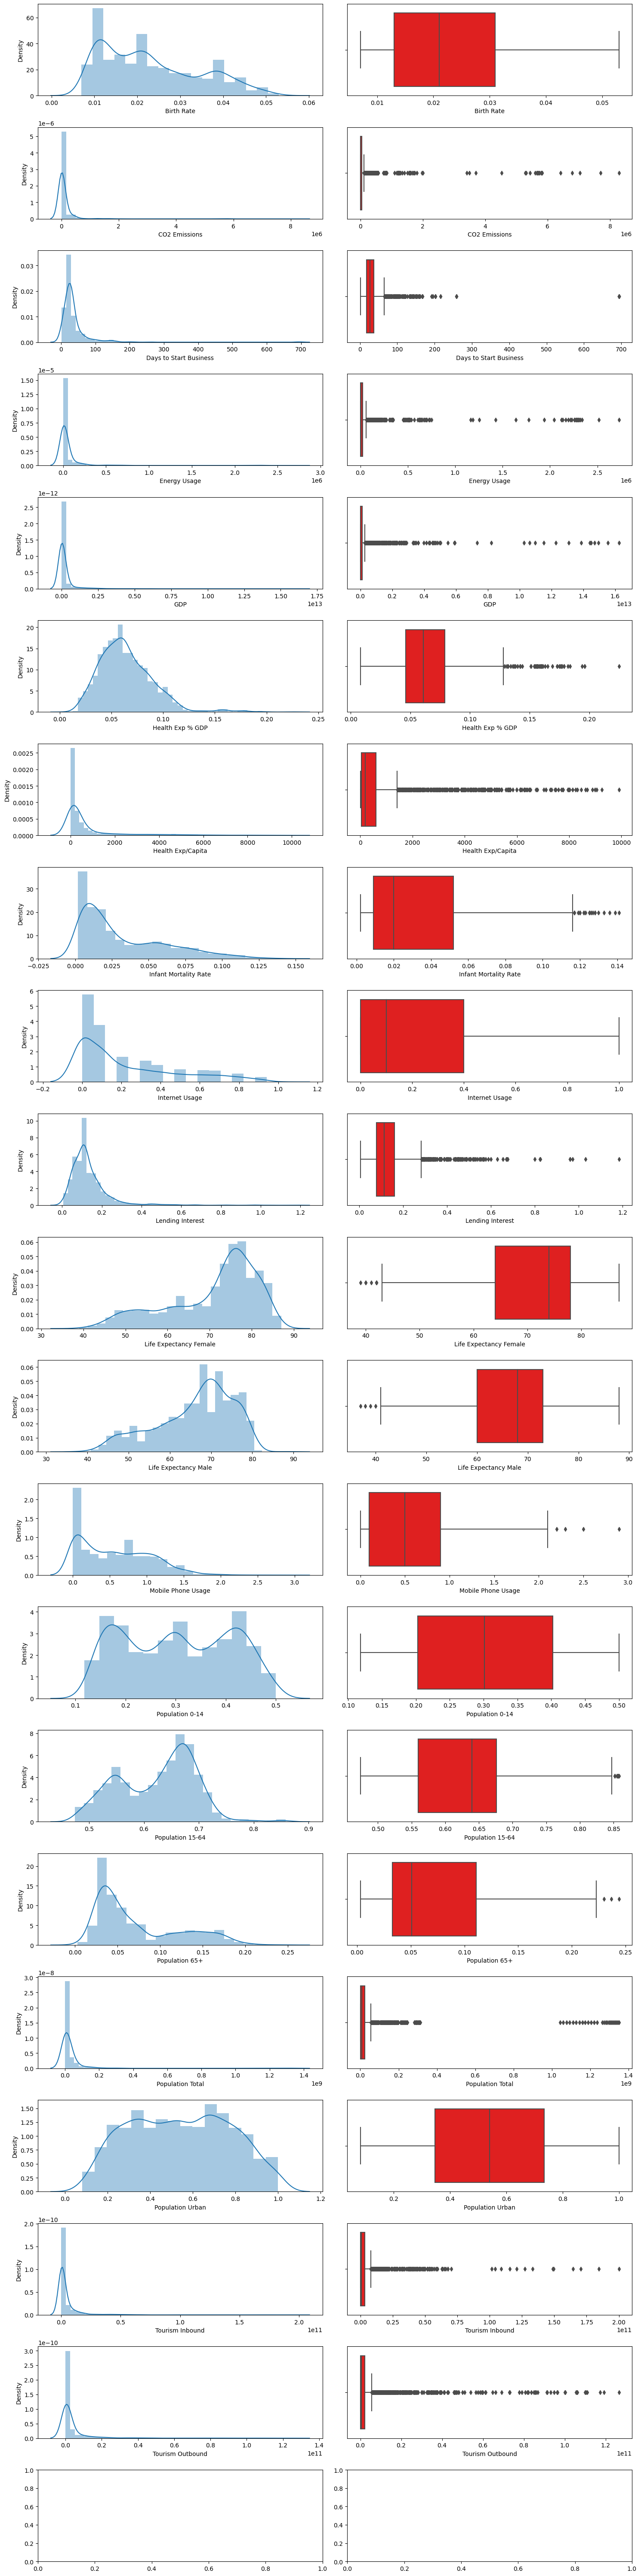

In [114]:
fig,ax=plt.subplots(nrows=df.shape[1], ncols=2, figsize=(15,60))

for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.distplot(df[col],ax=ax[i][0])
    sns.boxplot(df[col],ax=ax[i][1],color='red')
    ax[i][0].set_xlabel(col)
    ax[i][1].set_xlabel(col)

plt.tight_layout()


##### Birth Rate, Population 0 - 14, Internet Usage, Population Urban These Columns Have No outliners

##### Conclusion - From the Above Boxplot we can see there are large numbers of outliners, so Delelting them can result in loss of very important Information. so of now we can keep them.

### GROUP 1 VISUALISATION - ECONOMICAL POINT OF VIEW

### Top 10 Countries based on GDP

Text(0.5, 1.0, 'Top 10 Countries based on GDP')

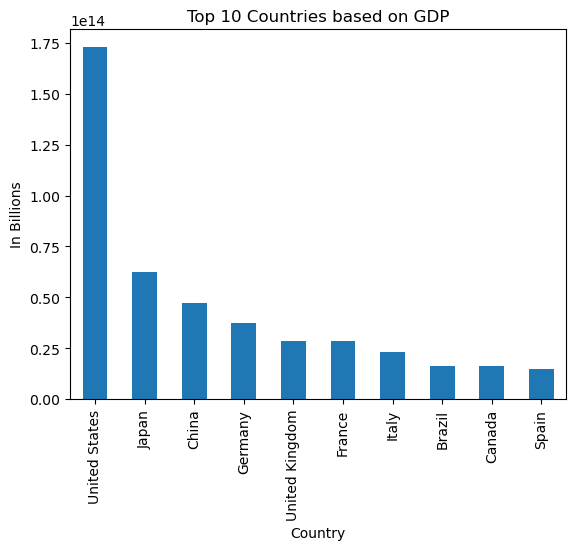

In [115]:
country_pop=df.groupby('Country')['GDP'].sum()

top_10_GDP = country_pop.nlargest(10)

df_pop_GDP=pd.Series(top_10_GDP)
df_pop_GDP.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('In Billions')
plt.title('Top 10 Countries based on GDP')

##### The GDP of the USA is so significant that it is equivalent to the combined GDPs of Japan, China, Germany, and the UK.

### Top 10 country by the Energy usage

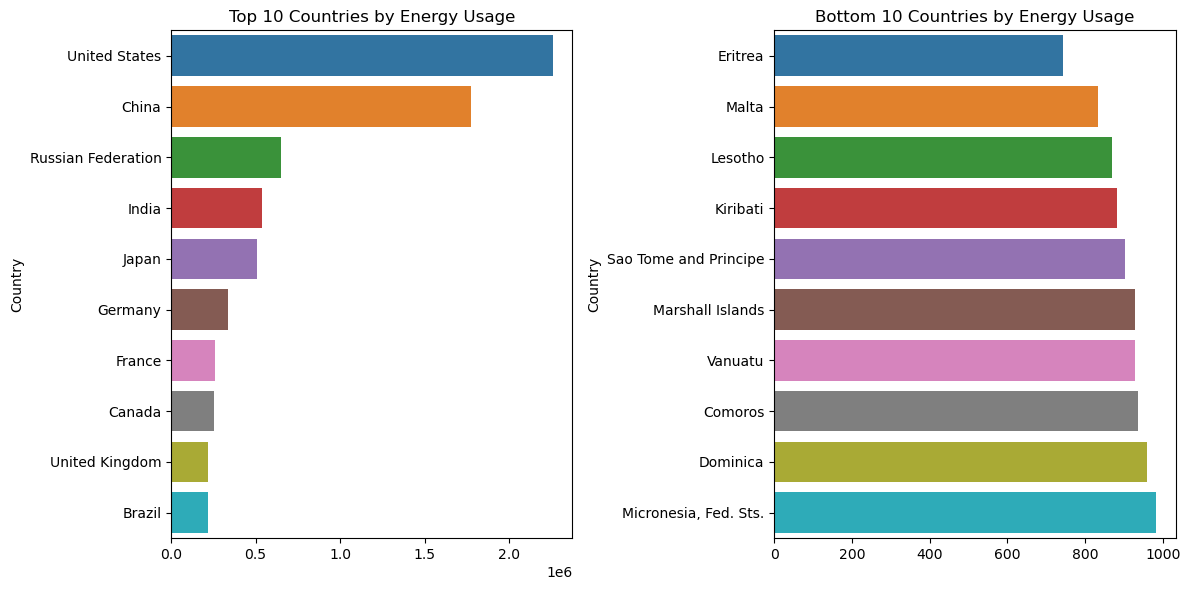

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

gp = df.groupby('Country')['Energy Usage'].median().nlargest(10)
gp1 = df.groupby('Country')['Energy Usage'].median().nsmallest(10)

sns.barplot(x=gp.values, y=gp.index, ax=axes[0])
sns.barplot(x=gp1.values, y=gp1.index, ax=axes[1])

axes[0].set_title('Top 10 Countries by Energy Usage')
axes[1].set_title('Bottom 10 Countries by Energy Usage')

plt.tight_layout()

##### TOP Energy Usage countries USA , CHINA , RUSSIA , INDIA , JAPAN 

### CO2 Emissions

In [117]:
list = []
list1 = []
for country in df['Country'].unique():
    
    median = df[df['Country'] == country]['CO2 Emissions'].median()
    list1.append(median)
    list.append(country)
   

In [118]:
co2 = pd.DataFrame()
co2['Country'] = list
co2['Avg. CO2 emissions'] = list1
co2['CO2 emissions in %'] = co2['Avg. CO2 emissions']/ sum(co2['Avg. CO2 emissions'])  * 100 

co2 = co2.sort_values(by=['Avg. CO2 emissions'], ascending=False) 
co2 = co2.reset_index()
co2.drop(columns=['index'], inplace=True) 
co2

,Country,Avg. CO2 emissions,CO2 emissions in %
0,United States,5656839.0,21.291183
1,China,5288166.0,19.903574
2,Russian Federation,1602963.0,6.033224
3,India,1348525.0,5.075572
4,Japan,1216751.0,4.579602
...,...,...,...
180,Dominica,114.0,0.000429
181,Marshall Islands,92.0,0.000346
182,Vanuatu,88.0,0.000331
183,Sao Tome and Principe,84.0,0.000316


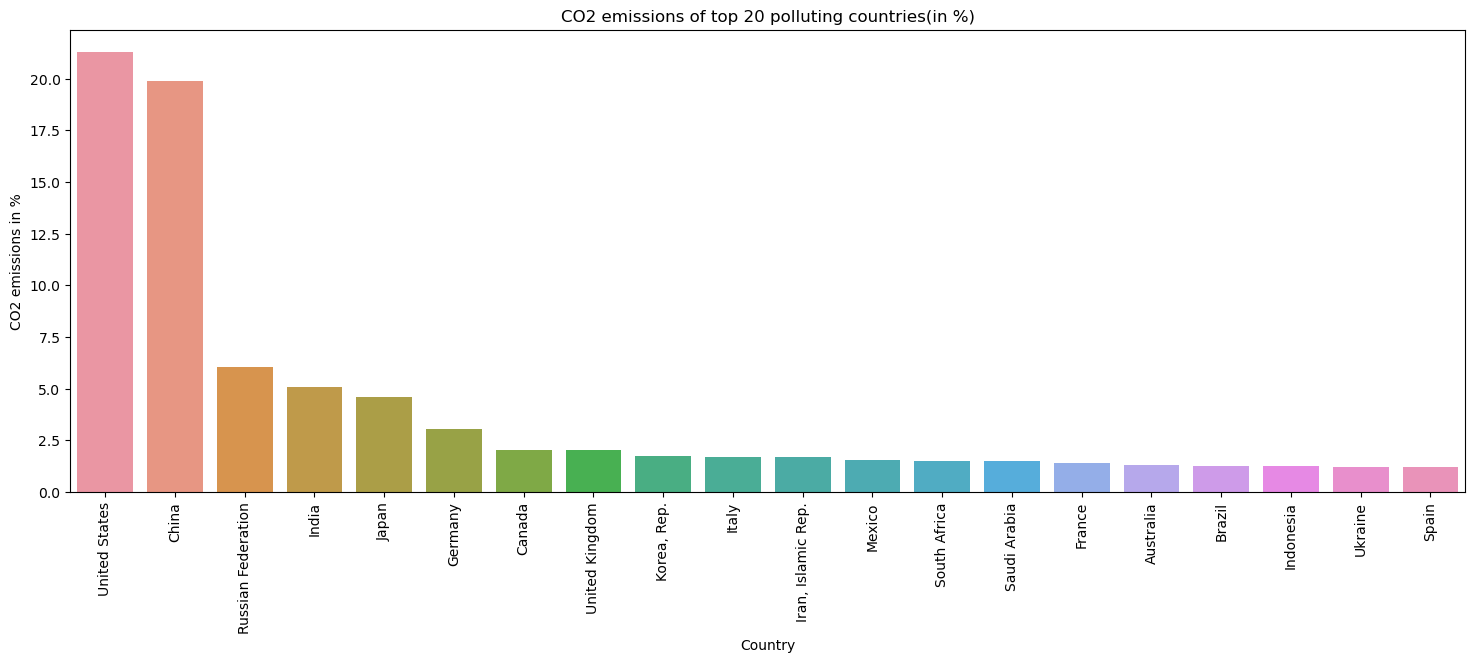

In [119]:
plt.figure(figsize=(18,6))
sns.barplot(x=co2['Country'].head(20), y=co2['CO2 emissions in %'].head(20))
plt.xticks(rotation = 90) 
plt.title('CO2 emissions of top 20 polluting countries(in %)') 

plt.show() 

#### USA, China, Russia, India accounts for 50% of CO2 emissions of the world

### Polluting Countries

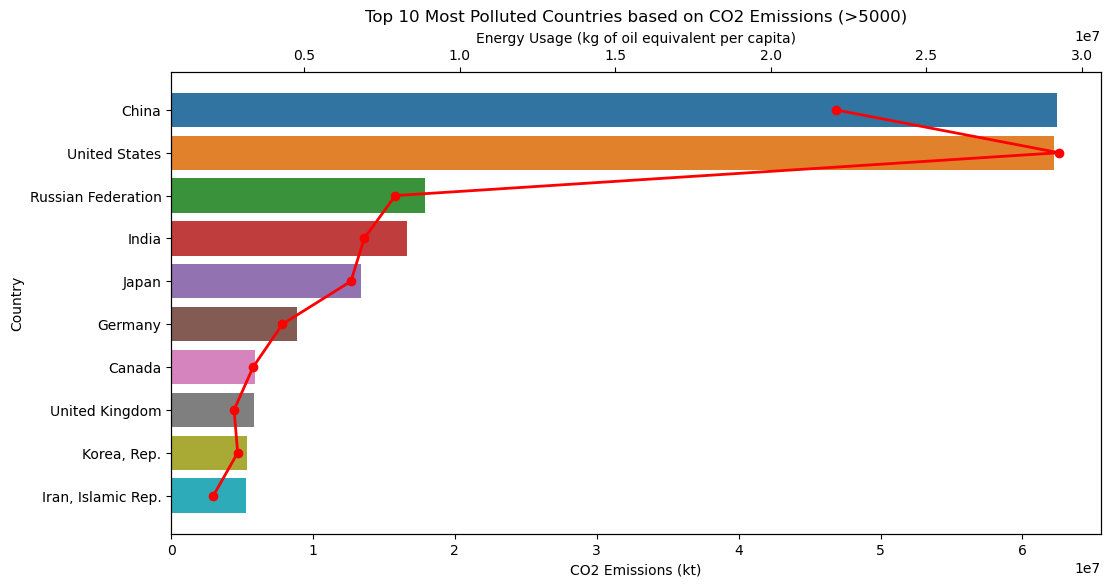

In [120]:
# Subset the DataFrame to include only countries with CO2 emissions above 5000
polluted_df = df[df['CO2 Emissions'] > 5000]

# Group the DataFrame by country and sum the CO2 emissions
polluted_df = polluted_df.groupby('Country')['CO2 Emissions','Energy Usage'].sum().nlargest(10,'CO2 Emissions')

# Create a horizontal bar chart
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(polluted_df['CO2 Emissions'],polluted_df.index)

# Set the chart title and axis labels
ax.set_title('Top 10 Most Polluted Countries based on CO2 Emissions (>5000)')
ax.set_xlabel('CO2 Emissions (kt)')
ax.set_ylabel('Country')

# Add energy usage as a secondary axis
#top_polluted_df=df.groupby('Country1')
ax2 = ax.twiny()
ax2.plot(polluted_df['Energy Usage'], polluted_df.index, color='red', marker='o', linewidth=2)
ax2.set_xlabel('Energy Usage (kg of oil equivalent per capita)')

# Show the chart
plt.show()


##### Group 2 Visualisation Insights : The GDP of a country depends on the total value of goods and services produced within its borders over a specific period of time, usually a year.GDP is influenced by factors such as consumer and business spending, government policies, international trade, inflation, and the overall health of the economy.

The use of energy has a significant impact on a country's GDP, CO2 emissions, and pollution levels, as businesses and factories often increase their energy usage to boost profits, leading to the release of carbon dioxide and pollution. However, this can have negative environmental consequences. Countries such as China, the USA, and Russia are among the most polluted due to their high energy usage and CO2 emissions. Meanwhile, countries like Japan, with lower energy usage, CO2 emissions, and pollution, rank high on the GDP list. It is worth noting that countries like India and Russia need to enhance their economic strategies to improve their GDP, as they are not even among the top five highest GDP countries.

### GROUP 2 VISUALISATION - TECHNOLOGY 

### Top 10 country by the Internet usage and Mobile Phone Usage

<AxesSubplot: xlabel='Country'>

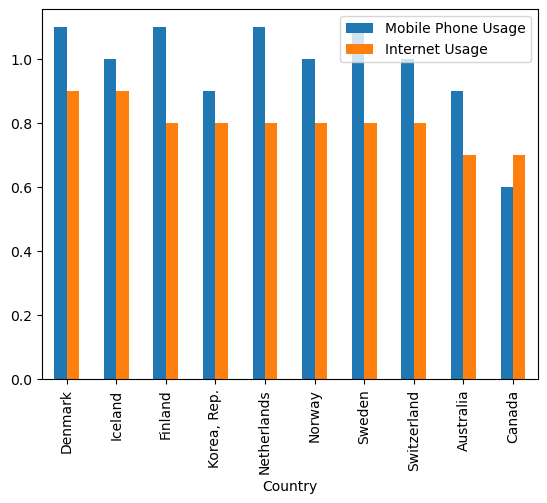

In [121]:
top_10_mobile=df.groupby('Country').median()[['Mobile Phone Usage','Internet Usage']].nlargest(10,'Internet Usage')
top_10_mobile.plot(kind='bar')

#### Insights - From 2000 to 2013, Denmark , Iceland , Finaland , Korea Rep. continued to experience high levels of internet and mobile usage due to several reasons: 

Overall, the combination of early adoption of broadband, high levels of internet penetration, advancements in mobile technology, and government policies that supported digital technologies contributed to the high levels of internet and mobile usage in Denmark , Iceland , Finaland , Korea Rep. from 2000 to 2013.

### GROUP 3 VISUALISATION - HEALTH

### Top 10 countries by Life Expectancy Male & Life Expectancy Female

(<Figure size 3000x1800 with 0 Axes>, <AxesSubplot: xlabel='Country'>)

<Figure size 3000x1800 with 0 Axes>

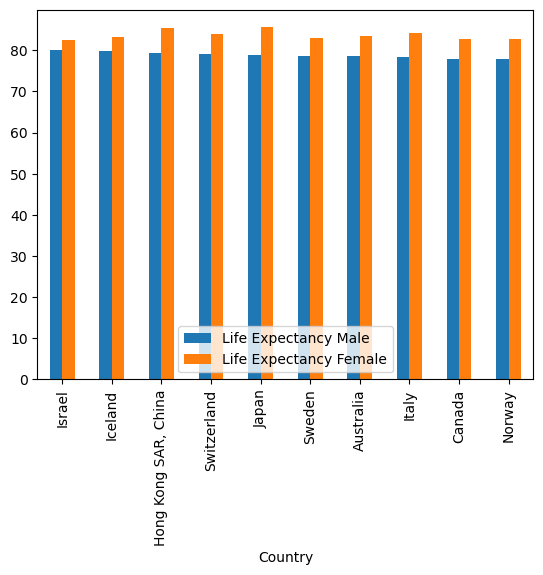

In [122]:
gp=df.groupby('Country')['Life Expectancy Male','Life Expectancy Female'].mean().nlargest(10,columns='Life Expectancy Male')
fig=plt.figure(figsize=(30,18))
fig,gp.plot(kind='bar')

#### Insights - Overall, the combination of high-quality healthcare, healthy lifestyle habits, strong social support networks, low rates of smoking, and high levels of education has contributed to the high life expectancies for both males and females in Israel, Iceland, and Hong Kong SAR, China.

(<Figure size 3000x1800 with 0 Axes>, <AxesSubplot: xlabel='Country'>)

<Figure size 3000x1800 with 0 Axes>

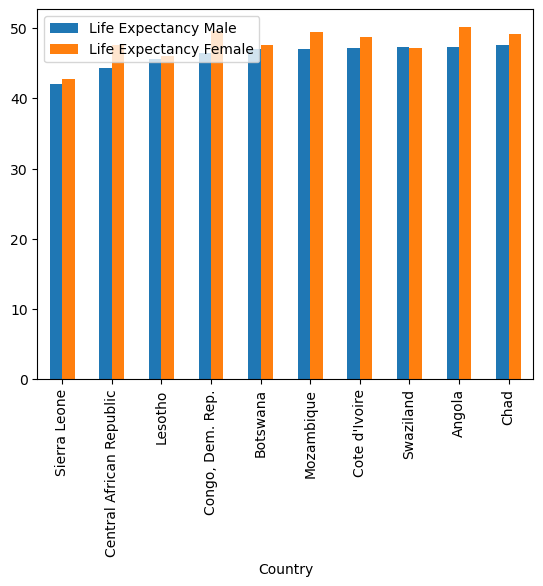

In [123]:
gp=df.groupby('Country')['Life Expectancy Male','Life Expectancy Female'].mean().nsmallest(10,columns='Life Expectancy Male')
fig=plt.figure(figsize=(30,18))
fig,gp.plot(kind='bar')

#### Insights - the combination of high rates of infectious diseases, poor healthcare infrastructure, malnutrition and food insecurity, limited access to education, and political instability and conflict has contributed to the low life expectancies for both males and females in Sierra Leone, Central African Republic, Lesotho, and Congo Democratic Republic.

### Birth Rate and Infant Mortality Rate

In [124]:
list = []
list1 = []
list2 = []

for country in df['Country'].unique():
    
    median = df[df['Country'] == country]['Birth Rate'].median()
    median1 = df[df['Country'] == country]['Infant Mortality Rate'].median()
    list.append(country)
    list1.append(median)
    list2.append(median1)
    
   

In [125]:
imr = pd.DataFrame()
imr['Country'] = list
imr['Avg. birth rate'] = list1 
imr['Avg. IMR'] = list2 

imr = imr.sort_values(by=['Avg. IMR'], ascending = True) 
imr = imr.reset_index()
imr.drop(columns=['index'], inplace=True) 
imr # countries listed according t0 their avg imr  

,Country,Avg. birth rate,Avg. IMR
0,Singapore,0.010,0.002
1,Iceland,0.014,0.002
2,Japan,0.009,0.003
3,Sweden,0.012,0.003
4,Slovenia,0.009,0.003
...,...,...,...
180,Chad,0.049,0.100
181,"Congo, Dem. Rep.",0.046,0.102
182,Central African Republic,0.037,0.109
183,Angola,0.049,0.120


In [126]:
imr_top_bottom = imr.head(10) 
imr_top_bottom = imr_top_bottom.append(imr.tail(10))

In [127]:
imr_top_bottom.tail(10)

,Country,Avg. birth rate,Avg. IMR
175,Mozambique,0.043,0.087
176,Cote d'Ivoire,0.037,0.087
177,Mali,0.048,0.093
178,Guinea-Bissau,0.040,0.094
179,Nigeria,0.042,0.094
180,Chad,0.049,0.100
181,"Congo, Dem. Rep.",0.046,0.102
182,Central African Republic,0.037,0.109
183,Angola,0.049,0.120
184,Sierra Leone,0.041,0.125


<AxesSubplot: xlabel='Avg. birth rate', ylabel='Avg. IMR'>

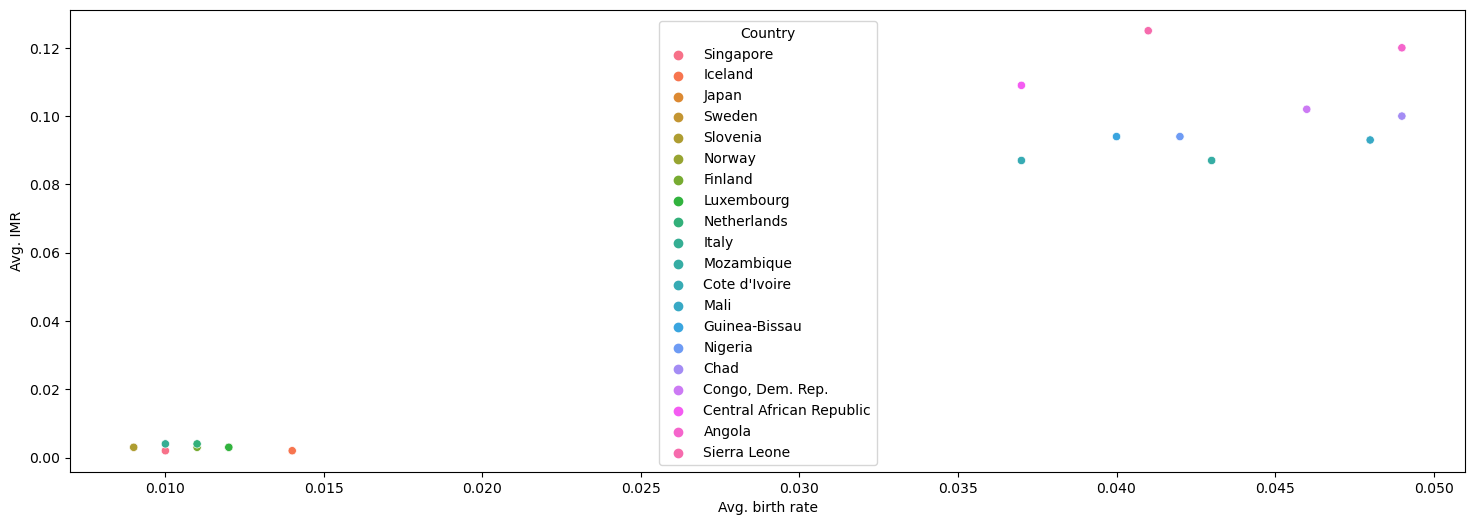

In [128]:
plt.figure(figsize=(18,6)) 
sns.scatterplot(imr_top_bottom['Avg. birth rate'], imr_top_bottom['Avg. IMR'], hue=imr_top_bottom['Country'])

(<Figure size 3000x1800 with 0 Axes>, <AxesSubplot: xlabel='Country'>)

<Figure size 3000x1800 with 0 Axes>

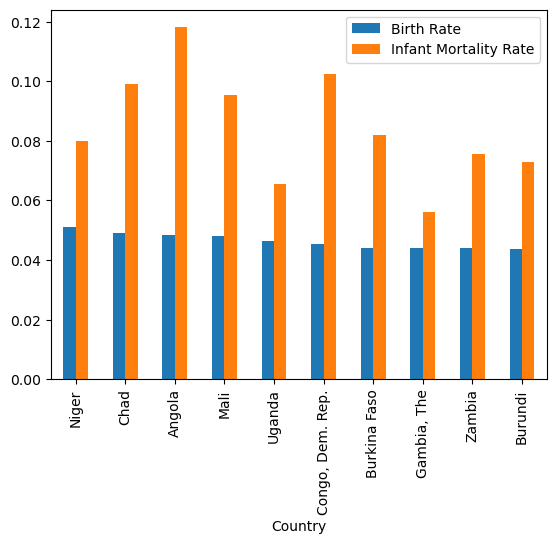

In [129]:
gp=df.groupby('Country')['Birth Rate','Infant Mortality Rate'].mean().nlargest(10,columns='Birth Rate')
fig=plt.figure(figsize=(30,18))
fig,gp.plot(kind='bar')

#### Insights -  Singapore, Iceland, Japan, and Sweden countries are known for their exceptional population health standards, whereas African nations such as Niger , Chad , Angola , Mali and etc have a severe shortage of health facilities.

### GROUP 4 Visualisation 

#### Standard of Living

In [130]:
list = []
list1 = []

for country in df['Country'].unique():
    
    median1 = df[df['Country'] == country]['Tourism Outbound'].median()
    list.append(country)
    list1.append(median1)

In [131]:
tourism_expd = pd.DataFrame()
tourism_expd['Country'] = list
tourism_expd['Tourism Outbound'] = list1

tourism_expd = tourism_expd.sort_values(by=['Tourism Outbound'], ascending = False) 
tourism_expd = tourism_expd.reset_index()
tourism_expd.drop(columns=['index'], inplace=True) 
tourism_expd # countries listed according to their tourism_expd from tourism  

,Country,Tourism Outbound
0,United States,1.054760e+11
1,Germany,8.597400e+10
2,United Kingdom,6.462700e+10
3,France,3.933100e+10
4,Japan,3.897600e+10
...,...,...
180,"Gambia, The",8.000000e+06
181,"Micronesia, Fed. Sts.",7.000000e+06
182,Tajikistan,6.600000e+06
183,Sao Tome and Principe,1.300000e+06


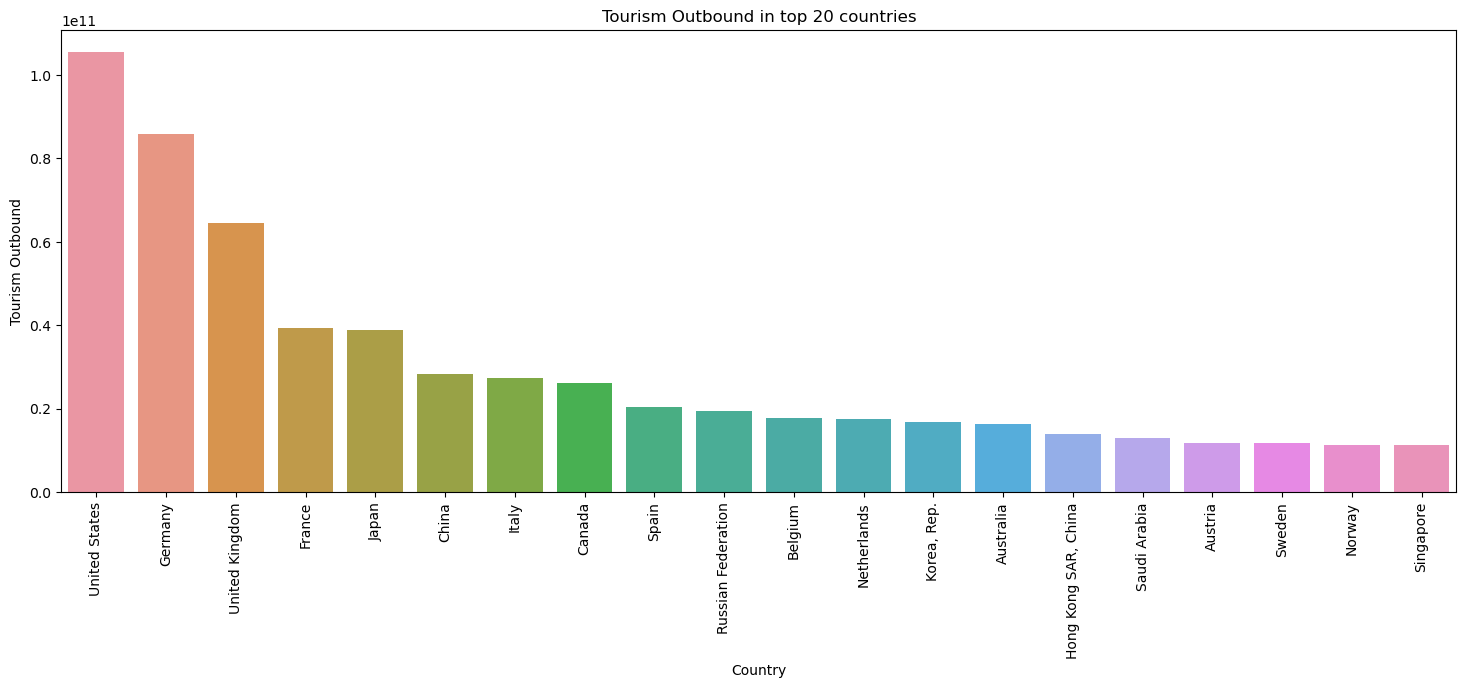

In [132]:
plt.figure(figsize=(18,6))
sns.barplot(tourism_expd['Country'].head(20) , tourism_expd['Tourism Outbound'].head(20))
plt.xticks(rotation = 90) 
plt.title('Tourism Outbound in top 20 countries') 
plt.show()

#### The basic necessities of humans are food, clothing, and shelter, and once these are fulfilled, individuals tend to pursue leisure and entertainment. Tourism is one recreational activity that people engage in when they have surplus funds and all their essential needs are met. The high spending on tourism by citizens of countries such as the US, Germany, the UK, France, and Japan indicates that these individuals have a high standard of living.

#### Revenue from Tourism

In [133]:
list = []
list1 = []

for country in df['Country'].unique():
    
    median1 = df[df['Country'] == country]['Tourism Inbound'].median()
    list.append(country)
    list1.append(median1)

In [134]:
revenue = pd.DataFrame()
revenue['Country'] = list
revenue['Tourism Inbound'] = list1

revenue = revenue.sort_values(by=['Tourism Inbound'], ascending = False) 
revenue = revenue.reset_index()
revenue.drop(columns=['index'], inplace=True) 
revenue # countries listed according to their revenue from tourism  

,Country,Tourism Inbound
0,United States,1.333930e+11
1,Spain,5.754300e+10
2,France,5.445000e+10
3,Germany,4.553800e+10
4,Italy,4.005800e+10
...,...,...
180,Central African Republic,7.200000e+06
181,Papua New Guinea,4.500000e+06
182,Marshall Islands,4.000000e+06
183,Kiribati,4.000000e+06


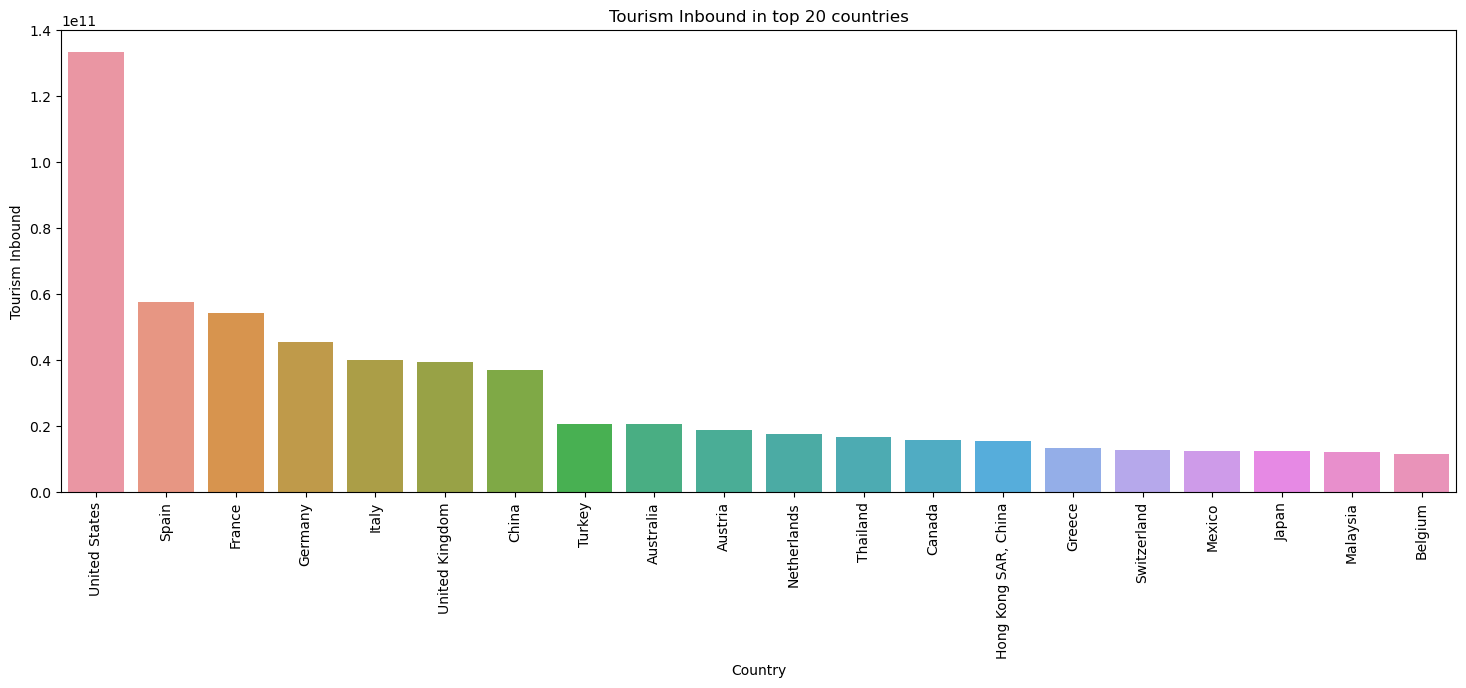

In [135]:
plt.figure(figsize=(18,6))
sns.barplot(revenue['Country'].head(20) , revenue['Tourism Inbound'].head(20))
plt.xticks(rotation = 90) 
plt.title('Tourism Inbound in top 20 countries') 
plt.show()

#### All but three countries, namely Turkey, Thailand, and Mexico, among the 17 mentioned, are developed countries, suggesting a tourist preference for such destinations.

#### 5. Urbanisation

In [136]:
list = []
list1 = []

for country in df['Country'].unique():
    
    median1 = df[df['Country'] == country]['Population Urban'].median()
    list.append(country)
    list1.append(median1)

In [137]:
urban = pd.DataFrame()
urban['Country'] = list
urban['Population Urban'] = list1

urban = urban.sort_values(by=['Population Urban'], ascending = False) 
urban = urban.reset_index()
urban.drop(columns=['index'], inplace=True) 
urban # countries listed according to their urbanisation 

,Country,Population Urban
0,"Hong Kong SAR, China",1.000
1,"Macao SAR, China",1.000
2,Singapore,1.000
3,Kuwait,0.982
4,Qatar,0.978
...,...,...
180,Malawi,0.151
181,Uganda,0.133
182,Papua New Guinea,0.131
183,Trinidad and Tobago,0.097


In [138]:
urban_top_bottom = urban.head(10) 
urban_top_bottom =urban_top_bottom.append(urban.tail(10))

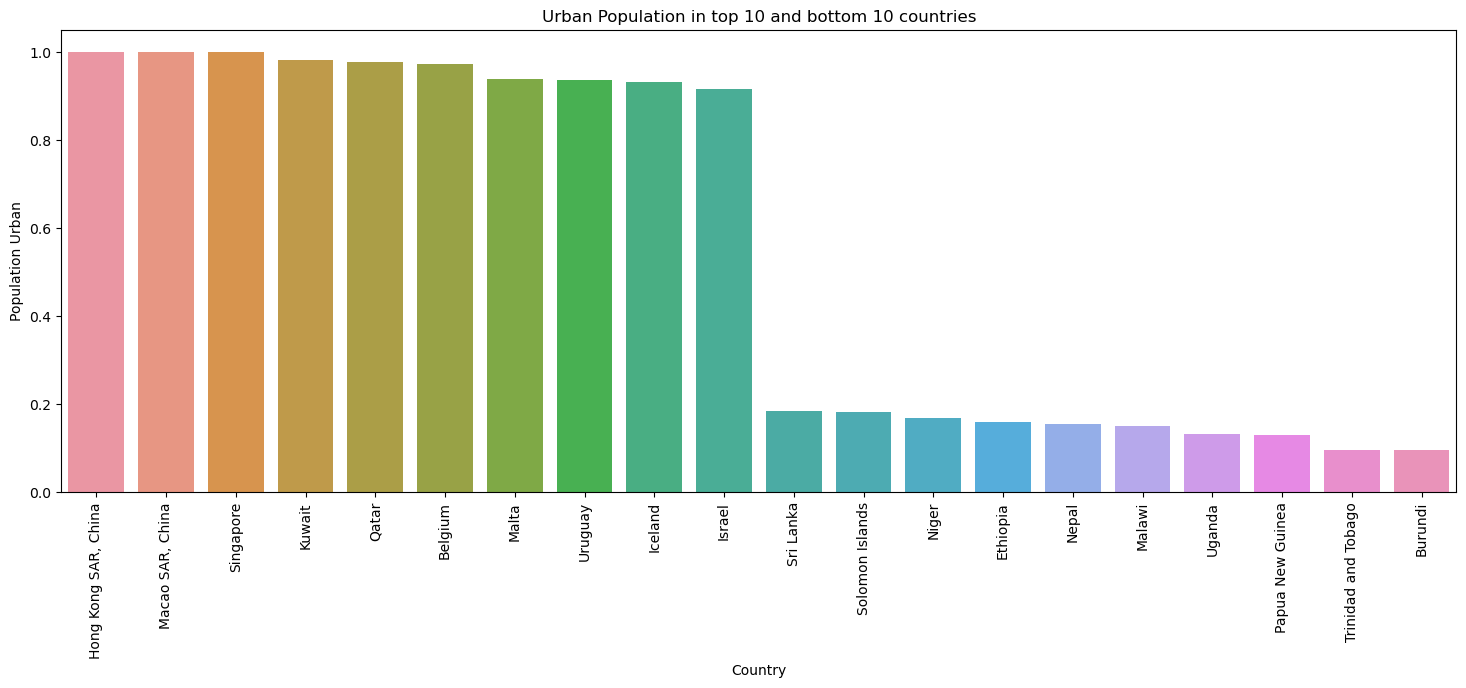

In [139]:
plt.figure(figsize=(18,6))
sns.barplot(urban_top_bottom['Country'] , urban_top_bottom['Population Urban'])
plt.xticks(rotation = 90) 
plt.title('Urban Population in top 10 and bottom 10 countries') 
plt.show()

#### Urbanization is the process of people moving from rural to urban areas, leading to a decline in the proportion of individuals residing in rural regions. This shift is often attributed to the availability of employment opportunities, educational institutions, urban lifestyle, and health facilities in cities. Typically, urbanized countries are also considered industrialized as urbanization and industrialization often occur simultaneously.

#### Countries such as Hong Kong,Macao, Singapore, Kuwait, Qatar, and Belgium are fully urbanized, while Burundi, Malawi, Uganda, Papua New Guinea, and Trinidad and Tobago have 80-85% of their population residing in rural areas, implying a slower pace of life and economic development.

### GROUP 5 VISUALISATION - GLOBAL POINT OF VIEW

### Top 10 Countries based on Total population

Text(0.5, 1.0, 'Top 10 Countries based on Total population')

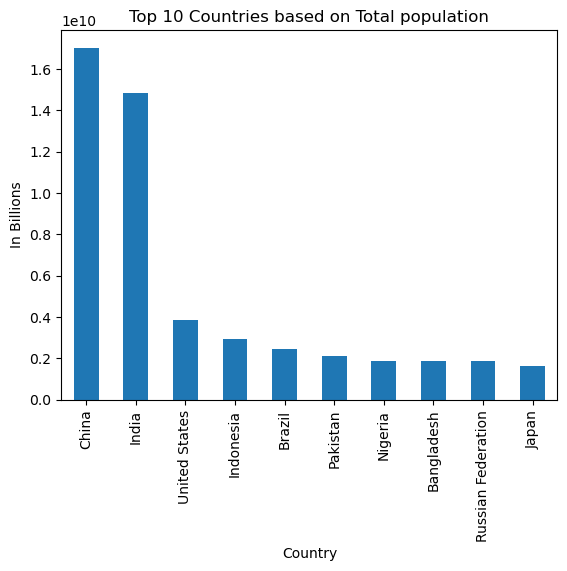

In [140]:
country_pop=df.groupby('Country')['Population Total'].sum()

top_10 = country_pop.nlargest(10)

df_pop=pd.Series(top_10)
df_pop.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('In Billions')
plt.title('Top 10 Countries based on Total population')

##### From the above bar chart we can see that China is most populated country,2most is india

#### Demography 

In [141]:
list = []
list1 = []
list2 = []
list3 = []

for country in df['Country'].unique():
    
    median1 = df[df['Country'] == country]['Population 0-14'].median()
    median2 = df[df['Country'] == country]['Population 15-64'].median()
    median3 = df[df['Country'] == country]['Population 65+'].median()
    list.append(country)
    list1.append(median1)
    list2.append(median2)
    list3.append(median3)

In [142]:
demo = pd.DataFrame()
demo['Country'] = list
demo['Population 0-14'] = list1
demo['Population 15-64'] = list2 
demo['Population 65+'] = list3
demo.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,Algeria,0.282,0.673,0.045
1,Angola,0.477,0.498,0.024
2,Benin,0.443,0.529,0.029
3,Botswana,0.354,0.613,0.033
4,Burkina Faso,0.464,0.510,0.025


### Countries having high Population in age group 14-65 (ie working population)

In [143]:
demo_15 = demo.sort_values(by=['Population 15-64'], ascending = False)
demo_15 = demo_15.reset_index()
demo_15.drop(columns=['index'], inplace=True) 
demo_15.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,United Arab Emirates,0.180,0.813,0.007
1,Qatar,0.210,0.778,0.013
2,"Macao SAR, China",0.161,0.766,0.074
3,"Hong Kong SAR, China",0.137,0.740,0.123
4,Singapore,0.188,0.729,0.083


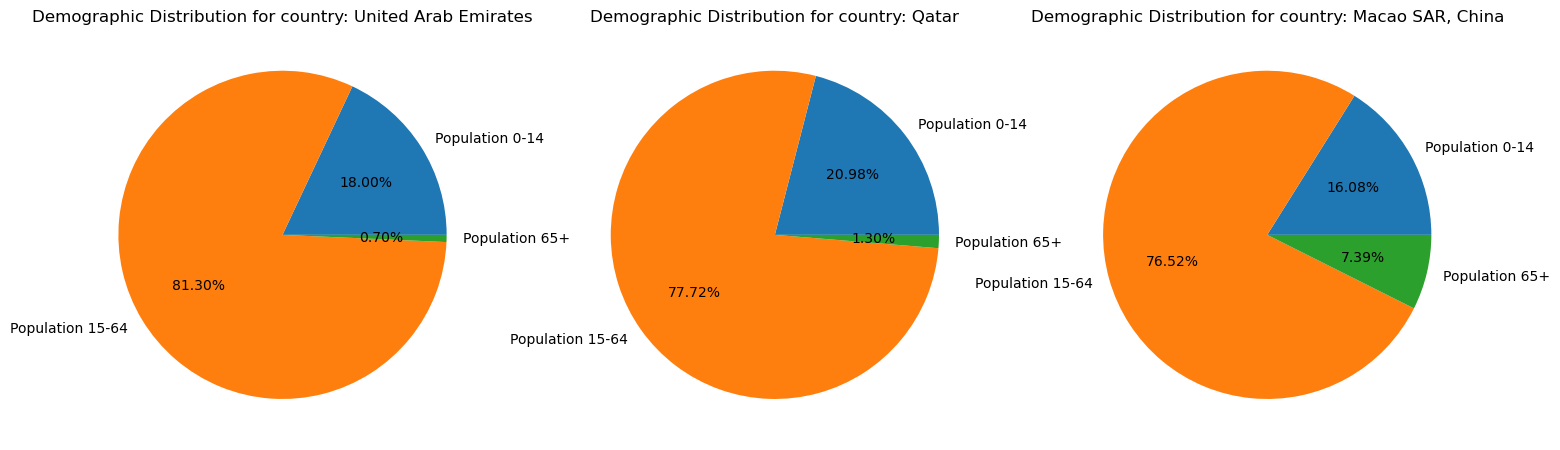

In [144]:
# Demographic composition of countries having high population in age group 14-65(ie working population)

plt.figure(figsize=(18,12))


plt.subplot(1,3,1)
plt.pie(demo_15.iloc[0,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: United Arab Emirates') 


plt.subplot(1,3,2)
plt.pie(demo_15.iloc[1,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Qatar') 

plt.subplot(1,3,3)
plt.pie(demo_15.iloc[2,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Macao SAR, China') 
plt.show() 


#### The UAE, Qatar, Macao, and Hong Kong have approximately 80% of their population comprising the workforce, indicating their potential for a demographic dividend (despite a significant portion of their workforce being composed of immigrants).

### Countries having high Population in age group 65+ (ie aged population)

In [145]:
demo_65 = demo.sort_values(by=['Population 65+'], ascending = False)
demo_65 = demo_65.reset_index()
demo_65.drop(columns=['index'], inplace=True) 
demo_65.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,Japan,0.137,0.659,0.204
1,Italy,0.141,0.661,0.198
2,Germany,0.141,0.665,0.194
3,Greece,0.145,0.669,0.187
4,Bulgaria,0.135,0.685,0.176


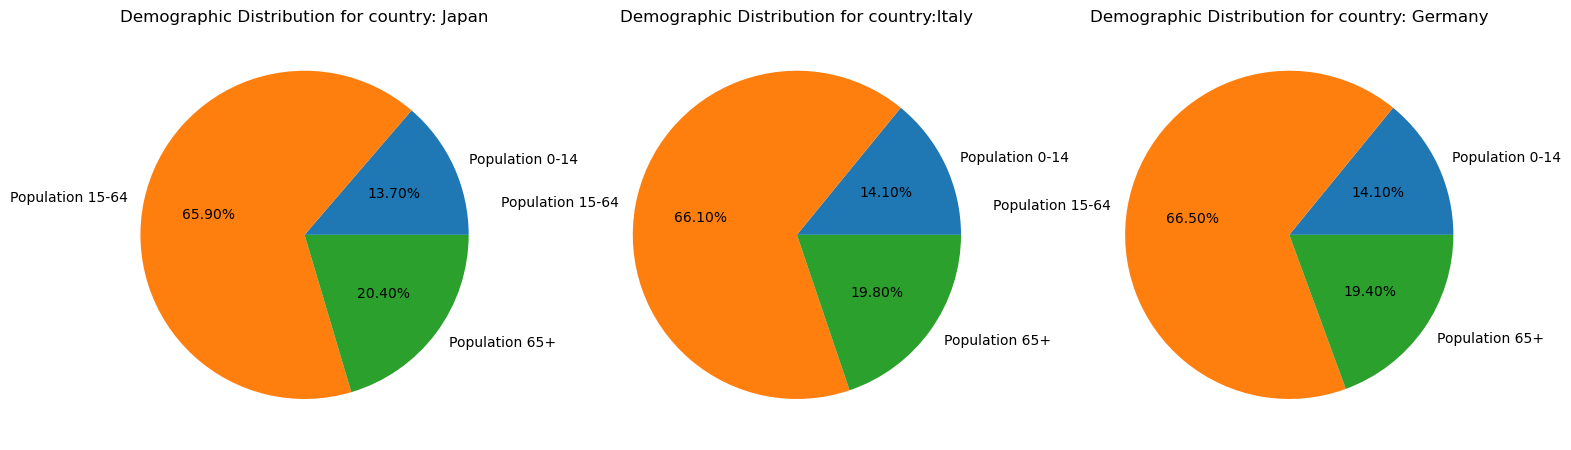

In [146]:
# Demographic composition of countries having high population in age group 65+(ie aged population)

plt.figure(figsize=(18,12))


plt.subplot(1,3,1)
plt.pie(demo_65.iloc[0,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Japan') 


plt.subplot(1,3,2)
plt.pie(demo_65.iloc[1,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country:Italy') 

plt.subplot(1,3,3)
plt.pie(demo_65.iloc[2,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Germany') 
plt.show() 


#### Japan, Italy, and Germany have the highest proportion of elderly individuals, leading to a scarcity of available human resources and an increase in healthcare expenses for the elderly.

In [147]:
demo_14 = demo.sort_values(by=['Population 0-14'], ascending = False) #dataframe arranged by population 0-14 column
demo_14 = demo_14.reset_index()
demo_14.drop(columns=['index'], inplace=True) 
demo_14.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,Uganda,0.493,0.482,0.025
1,Afghanistan,0.493,0.487,0.020
2,Niger,0.492,0.483,0.025
3,Chad,0.491,0.482,0.026
4,Timor-Leste,0.478,0.494,0.028


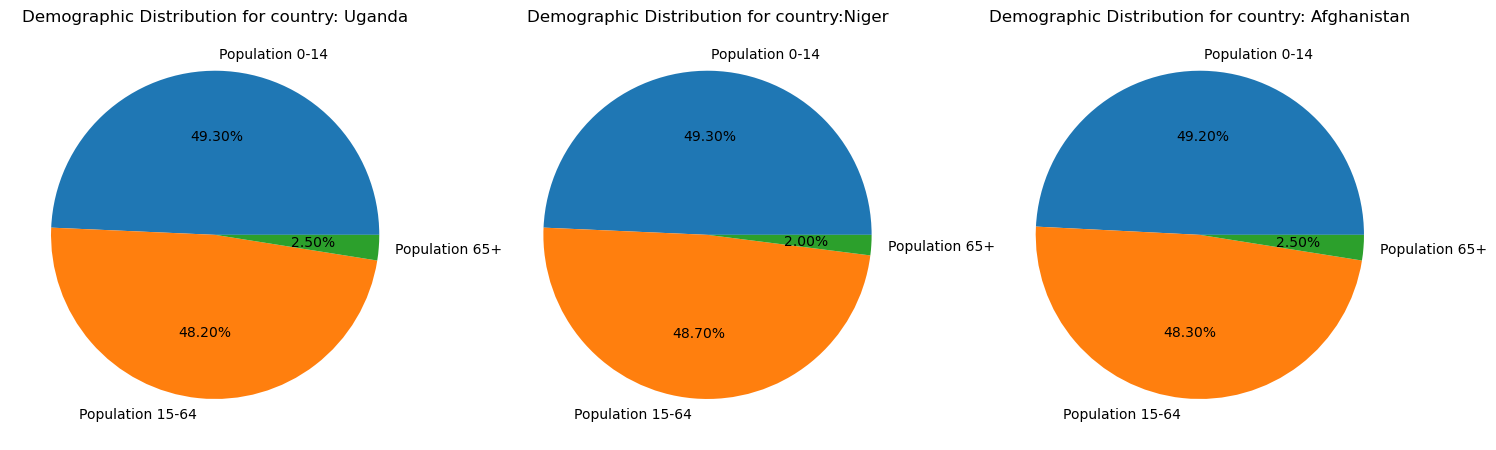

In [148]:
# Demographic composition of countries having high population in age group 0-14 (ie aged population)

plt.figure(figsize=(18,12))


plt.subplot(1,3,1)
plt.pie(demo_14.iloc[0,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Uganda') 


plt.subplot(1,3,2)
plt.pie(demo_14.iloc[1,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country:Niger') 

plt.subplot(1,3,3)
plt.pie(demo_14.iloc[2,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Afghanistan') 
plt.show() 


#### Uganda, Niger, and Afghanistan have the highest proportion of individuals in the age group of 0-14, signifying that almost 50% of their population is economically unproductive and considered a liability. This segment of the population requires substantial investment in their health and education.

Uganda, Niger, and Afghanistan have a proportion of elderly individuals below 3%, indicating a low life expectancy.

## <h1><center><font color=1E9199>Data Preprocessing</font></center></h1>

### Factor analysis

#### Factor analysis is a statistical method that can be used to reduce the dimensionality of a dataset with highly correlated independent variables. It involves identifying underlying factors that explain the correlations among the variables and using these factors as new, uncorrelated variables that can be used in further analysis

In [149]:
from factor_analyzer import FactorAnalyzer

In [150]:
fact_df=df.drop(columns=['Country'])
fact_df

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,27.0,2.699800e+04,54790058957,0.035,60,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,9542.0,27.0,7.499000e+03,9129594819,0.034,22,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,1617.0,27.0,1.983000e+03,2359122303,0.043,15,0.090,0.0,0.080,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,4276.0,27.0,1.836000e+03,5788311645,0.047,152,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,1041.0,27.0,1.932561e+03,2610959139,0.051,12,0.096,0.0,0.089,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,0.018,10213.0,694.0,7.940000e+03,5012121212,0.059,521,0.021,0.3,0.117,74.0,68.0,1.1,0.278,0.656,0.066,534541,0.662,79000000,58000000
2401,0.015,10213.0,41.0,7.940000e+03,23436342520,0.054,972,0.020,0.6,0.077,74.0,66.0,1.4,0.207,0.705,0.088,1337439,0.088,732500000,474000000
2402,0.013,10213.0,5.0,2.132446e+06,16244600000000,0.179,8895,0.006,0.8,0.033,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,200092000000,126573000000
2403,0.015,10213.0,7.0,7.940000e+03,50004354667,0.089,1308,0.010,0.5,0.112,80.0,74.0,1.5,0.220,0.639,0.140,3395253,0.948,2222000000,1028000000


In [151]:
from sklearn.preprocessing import StandardScaler
X_Factor = StandardScaler().fit_transform(fact_df)
X_Factor

array([[-0.27232711, -0.06733515, -0.19123855, ...,  0.24015165,
        -0.3447499 , -0.33003116],
       [ 2.38106937, -0.20240937, -0.19123855, ..., -0.93471555,
        -0.34972566, -0.33369507],
       [ 1.76194352, -0.21606516, -0.19123855, ..., -0.68265314,
        -0.34657922, -0.34117879],
       ...,
       [-0.89145295, -0.20125316, -0.6425513 , ...,  1.14586746,
        14.28911152,  9.5219827 ],
       [-0.71455986, -0.20125316, -0.60152287, ...,  1.73116494,
        -0.18962321, -0.26493833],
       [-0.27232711, -0.20125316,  2.20892471, ...,  1.47910252,
        -0.28606518, -0.09546311]])

### 1.1 CHECK ADEQUACY

In [152]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(fact_df)
X_Factor = pd.DataFrame(X_scaled, columns=fact_df.columns)

In [153]:
df1 = X_Factor

In [154]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [155]:
#Bartlett
#p-value should be 0 (statistically sig.)

chi_square_value,p_value=calculate_bartlett_sphericity(df1)
print(chi_square_value, p_value)

74275.6501417524 0.0


In [156]:
#KMO

#Value should be 0.6<

kmo_all,kmo_model=calculate_kmo(df1)

print(kmo_model)

0.8467491384758671


### The KMO measure ranges from 0 to 1, with values closer to 1 indicating that the data is more suitable for factor analysis.

In [157]:
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax',n_factors=df1.shape[1])
fa.fit(df1)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([8.83965227e+00, 3.83206822e+00, 1.57439298e+00, 1.01412804e+00,
       9.16689813e-01, 6.99930076e-01, 6.57270414e-01, 5.10101197e-01,
       4.56599619e-01, 4.23704868e-01, 2.94351815e-01, 2.40055786e-01,
       1.45167686e-01, 1.14062604e-01, 1.07330876e-01, 8.06741888e-02,
       4.04638829e-02, 3.76672134e-02, 1.56246454e-02, 6.38116410e-05])

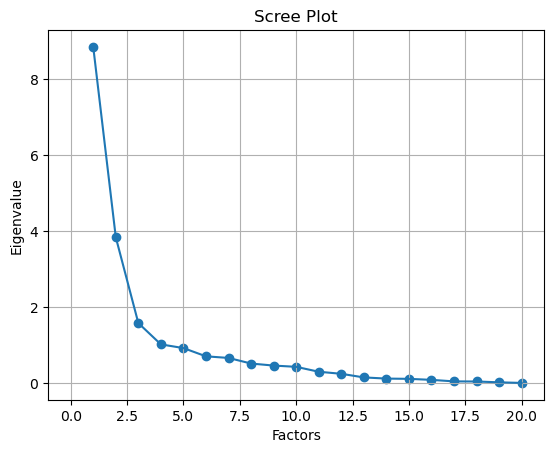

In [158]:
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1,df1.shape[1]+1),ev)
plt.hlines(1,0,0)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### From above plot,we can see that eigen values for Three factors are more than 1,so we consider only only four factors

(<Figure size 1200x1000 with 2 Axes>, <AxesSubplot: >)

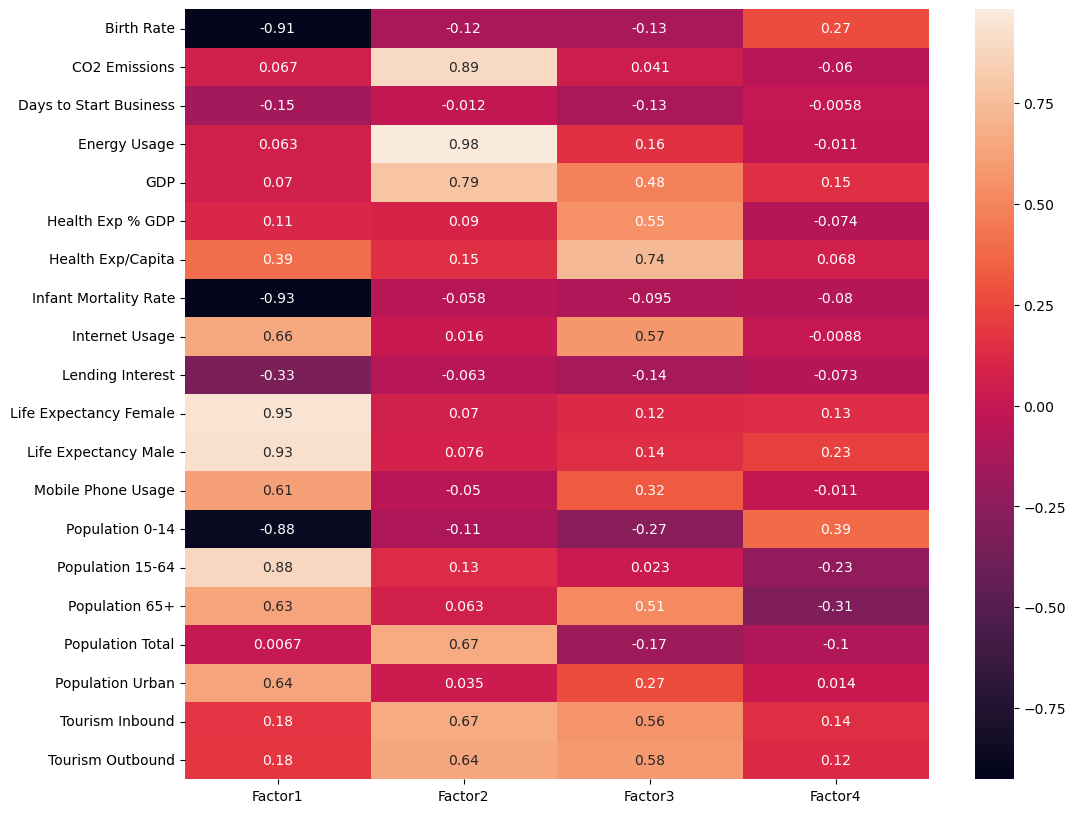

In [159]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df1)
loads=pd.DataFrame(fa.loadings_,columns=['Factor1','Factor2','Factor3','Factor4'],index=df1.columns)
fig=plt.figure(figsize=(12,10))
fig,sns.heatmap(loads,annot=True)

In [160]:
var_expld=pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
var_expld

,0,1,2,3
Variance,6.988720,3.781261,2.713373,0.539949
Proportional Var,0.349436,0.189063,0.135669,0.026997
Cumulative Var,0.349436,0.538499,0.674168,0.701165


- Proportional variance is the variance explained by a factor out of the total variance. 
- Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. 
- In our case, the 4 factors together are able to explain 66.24% of the total variance.

- Factor 1: Based on the factor loadings, factor 1 seems to be primarily capturing variance in population demographics, with strong negative loadings for Birth Rate, Infant Mortality Rate, and Population 0-14, and strong positive loadings for Population 15-64 and Population 65+. This suggests that countries with younger populations (higher birth rates and larger percentages of children) tend to have lower scores on Factor 1, while countries with older populations (higher percentages of working-age adults and elderly individuals) tend to have higher scores on Factor 1. The loadings for Life Expectancy Female and Life Expectancy Male are also positive, which may indicate that countries with higher life expectancies also tend to have higher scores on this factor.

- Factor 2: Based on the loadings of the variables onto factor 2, we can say that factor 2 is mainly capturing the variation in economic and environmental factors. The variables with high positive loadings on factor 2 are CO2 Emissions, GDP, Population Total, Tourism Inbound, and Tourism Outbound. These variables are all related to economic activity and environmental impact, such as greenhouse gas emissions and tourism. Therefore, we can interpret factor 2 as representing economic and environmental factors.

- Factor 3: This factor has high positive loadings for Business Tax Rate, Days to Start Business, and Ease of Business, indicating that it captures factors related to the ease of doing business. It could be interpreted as a "business environment" factor.

- Factor 4: This factor has high positive loadings for Health Exp/Capita, Health Exp % GDP, Life Expectancy Female, Life Expectancy Male, and Population 65+, indicating that it captures factors related to health and aging populations. It could be interpreted as a "health and aging" factor.

In [161]:
factor_scores = fa.transform(df1)

In [162]:
factor_scores

array([[ 0.07942394,  0.09481367, -0.90616977,  0.07833143],
       [-1.35095136, -0.15927706,  1.63346728, -9.6942994 ],
       [-1.49536358, -0.17886807,  0.20934089, -0.70056324],
       ...,
       [-0.46629099,  8.72496764,  8.60899251, -1.35542945],
       [ 1.5876845 , -0.52895978,  1.35406048, -6.33733154],
       [ 0.36012271, -0.40019419, -0.35490303,  3.24743252]])

### Feature Scaling

In [163]:
df_no_country = df.drop(columns=['Country'])

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [165]:
df_norm = scaler.fit_transform(df_no_country)
df_norm 

array([[2.82608696e-01, 1.06100181e-02, 3.75180375e-02, ...,
        5.63180828e-01, 5.06268888e-04, 1.52323406e-03],
       [9.34782609e-01, 1.15061329e-03, 3.75180375e-02, ...,
        2.63616558e-01, 1.66424027e-04, 1.15190625e-03],
       [7.82608696e-01, 1.94282894e-04, 3.75180375e-02, ...,
        3.27886710e-01, 3.81325925e-04, 3.93449461e-04],
       ...,
       [1.30434783e-01, 1.23158461e-03, 5.77200577e-03, ...,
        7.94117647e-01, 1.00000000e+00, 1.00000000e+00],
       [1.73913043e-01, 1.23158461e-03, 8.65800866e-03, ...,
        9.43355120e-01, 1.11014322e-02, 8.12022804e-03],
       [2.82608696e-01, 1.23158461e-03, 2.06349206e-01, ...,
        8.79084967e-01, 4.51443916e-03, 2.52961142e-02]])

### PCA

In [166]:
from sklearn.decomposition import PCA
pca = PCA() 

In [167]:
df_pca = pca.fit_transform(df_norm)
df_pca 

array([[ 1.68623503e-01, -2.51823825e-01, -1.20730470e-01, ...,
         2.57896670e-03, -1.93583133e-03,  4.85330650e-05],
       [ 1.27228314e+00,  3.17023971e-01, -5.35269488e-02, ...,
        -1.51940030e-05,  1.97767568e-03,  1.80576886e-03],
       [ 9.18386117e-01,  1.61514672e-01, -7.12878385e-02, ...,
        -6.74478203e-03, -6.72020485e-04,  1.75427957e-04],
       ...,
       [-1.10461440e+00,  1.24728797e+00,  4.41540038e-01, ...,
         1.39861229e-01,  1.04667251e-01,  1.14136825e-03],
       [-6.95669832e-01,  1.62143805e-01, -2.26198076e-01, ...,
         1.42199460e-02, -6.45801893e-04,  1.28389346e-03],
       [-3.89404809e-01,  5.17080008e-02, -3.61837878e-01, ...,
         8.29161199e-03, -1.37827515e-02, -4.79319437e-04]])

In [168]:
var = pca.explained_variance_ratio_ 
var  

array([6.59534015e-01, 7.88439325e-02, 5.93456127e-02, 4.69053712e-02,
       3.99522150e-02, 3.34465809e-02, 1.48773634e-02, 1.38650525e-02,
       1.06064300e-02, 9.81470190e-03, 8.06642149e-03, 6.85495252e-03,
       6.64350019e-03, 3.92424824e-03, 3.47875786e-03, 1.47923498e-03,
       1.10516401e-03, 8.51949143e-04, 3.98703347e-04, 5.79281596e-06])

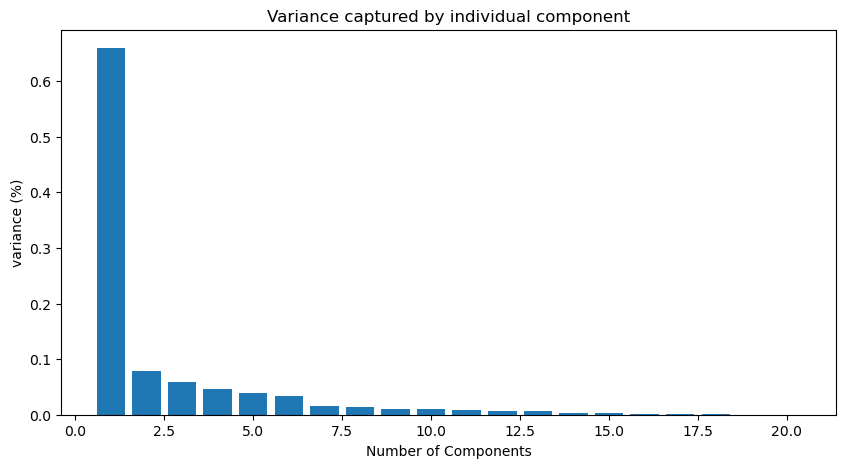

In [169]:
#Variance captured by individual PCs.
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)

plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [170]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1  

array([ 65.95,  73.83,  79.76,  84.45,  88.45,  91.79,  93.28,  94.67,
        95.73,  96.71,  97.52,  98.21,  98.87,  99.26,  99.61,  99.76,
        99.87,  99.96, 100.  , 100.  ])

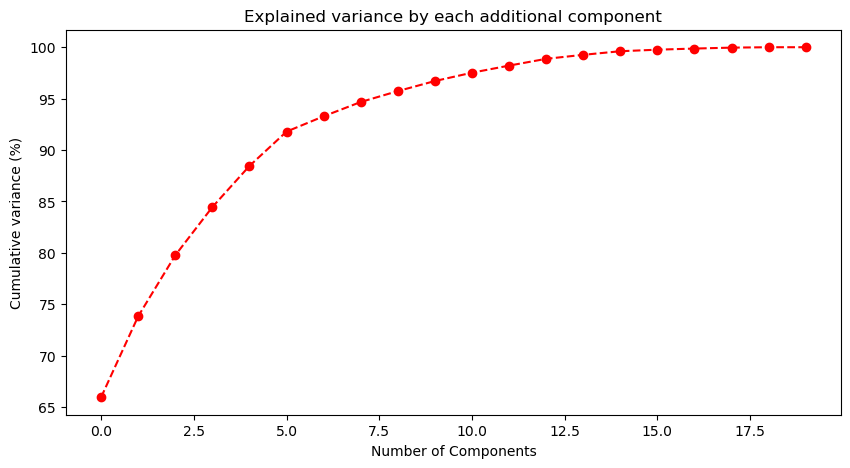

In [171]:
# Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='--', marker='o') 

plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show() 

In [172]:
#first 13 PCs
pca = PCA(n_components=13)
df_pca = pca.fit_transform(df_norm)
df_pca

array([[ 0.1686235 , -0.25182382, -0.12073047, ..., -0.00326032,
        -0.00339695,  0.0019411 ],
       [ 1.27228314,  0.31702397, -0.05352695, ..., -0.23588967,
         0.17329159,  0.02303456],
       [ 0.91838612,  0.16151467, -0.07128784, ..., -0.03752302,
         0.02750583, -0.08636819],
       ...,
       [-1.1046144 ,  1.24728797,  0.44154004, ..., -0.07295337,
         0.06785276, -0.10581851],
       [-0.69566983,  0.16214381, -0.22619808, ..., -0.02842085,
        -0.006874  ,  0.01561914],
       [-0.38940481,  0.051708  , -0.36183788, ...,  0.11748855,
        -0.08806237, -0.04951187]])

In [173]:
var = pca.explained_variance_ratio_ 
var

array([0.65953402, 0.07884393, 0.05934561, 0.04690537, 0.03995221,
       0.03344658, 0.01487736, 0.01386505, 0.01060643, 0.0098147 ,
       0.00806642, 0.00685495, 0.0066435 ])

In [174]:
#Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1  

array([65.95, 73.83, 79.76, 84.45, 88.45, 91.79, 93.28, 94.67, 95.73,
       96.71, 97.52, 98.21, 98.87])

In [175]:
# Creating a df with PC0, PC1, PC2...PC12 columns for clustering purpose.

df_pca = pd.DataFrame(data=df_pca, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
df_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.168624,-0.251824,-0.120730,0.140094,0.032082,-0.022035,-0.121156,0.011603,-0.052397,-0.022221,-0.003260,-0.003397,0.001941
1,1.272283,0.317024,-0.053527,0.061864,-0.292551,0.062748,-0.109103,-0.039884,0.434455,0.493032,-0.235890,0.173292,0.023035
2,0.918386,0.161515,-0.071288,0.028233,-0.046673,-0.009040,-0.098654,-0.072682,-0.037506,-0.071989,-0.037523,0.027506,-0.086368
3,0.582991,0.001028,-0.078485,0.104576,-0.221107,0.105775,-0.068607,0.053899,-0.097532,0.018604,0.015970,-0.091663,0.145747
4,1.101409,0.216533,0.104612,-0.050246,-0.049240,0.009576,-0.077312,-0.043278,-0.040766,-0.063940,-0.030965,0.016034,-0.064720


## <h1><center><font color=1E9199>Clustering</font></center></h1>

## Hierarchical Clustering

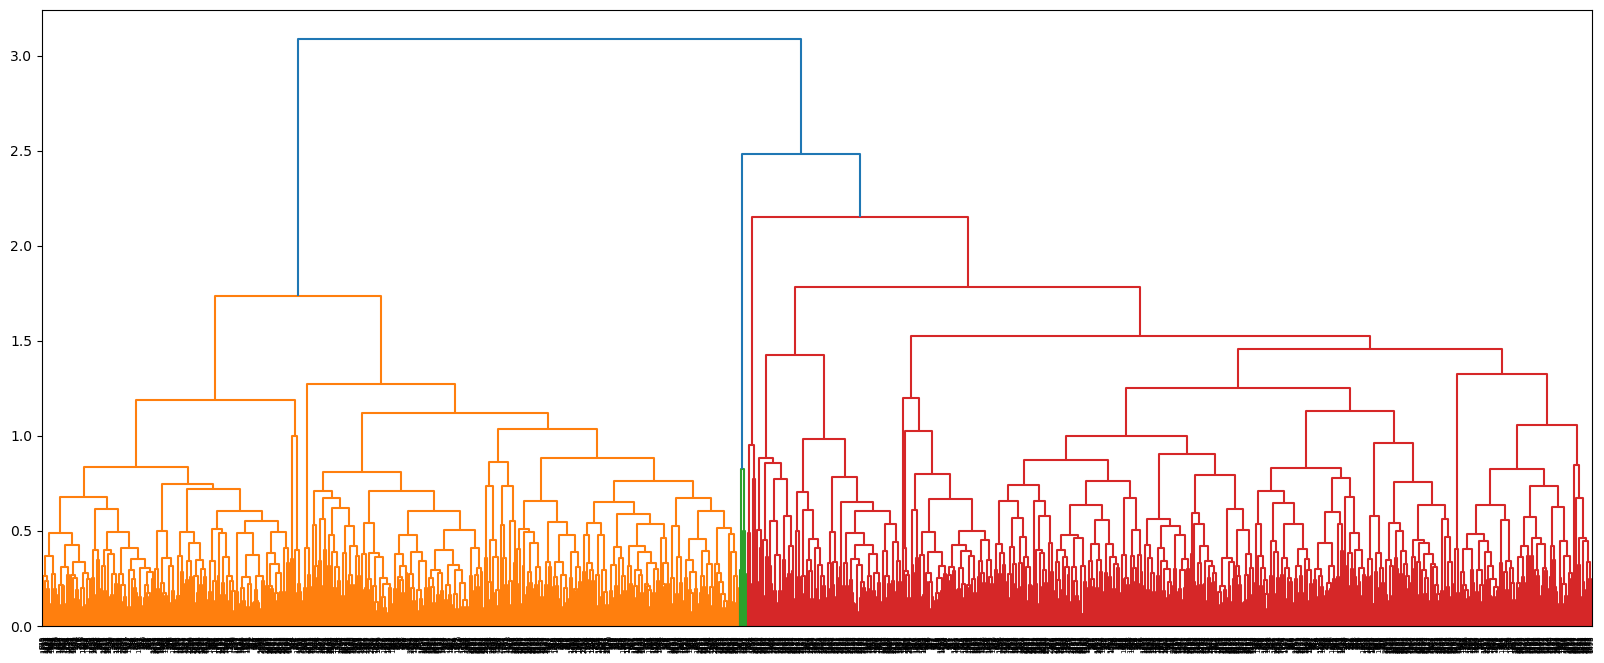

In [176]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method= 'complete'))

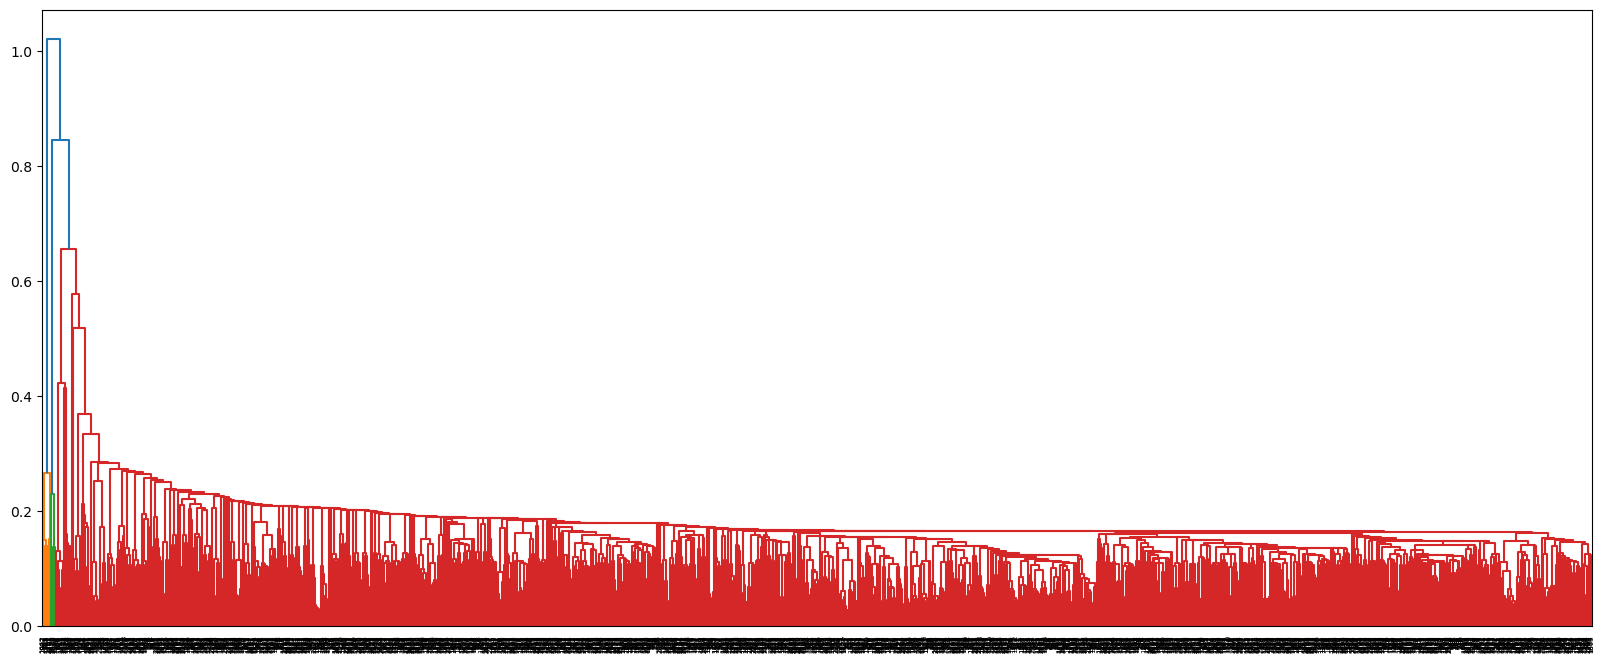

In [177]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method= 'single')) 

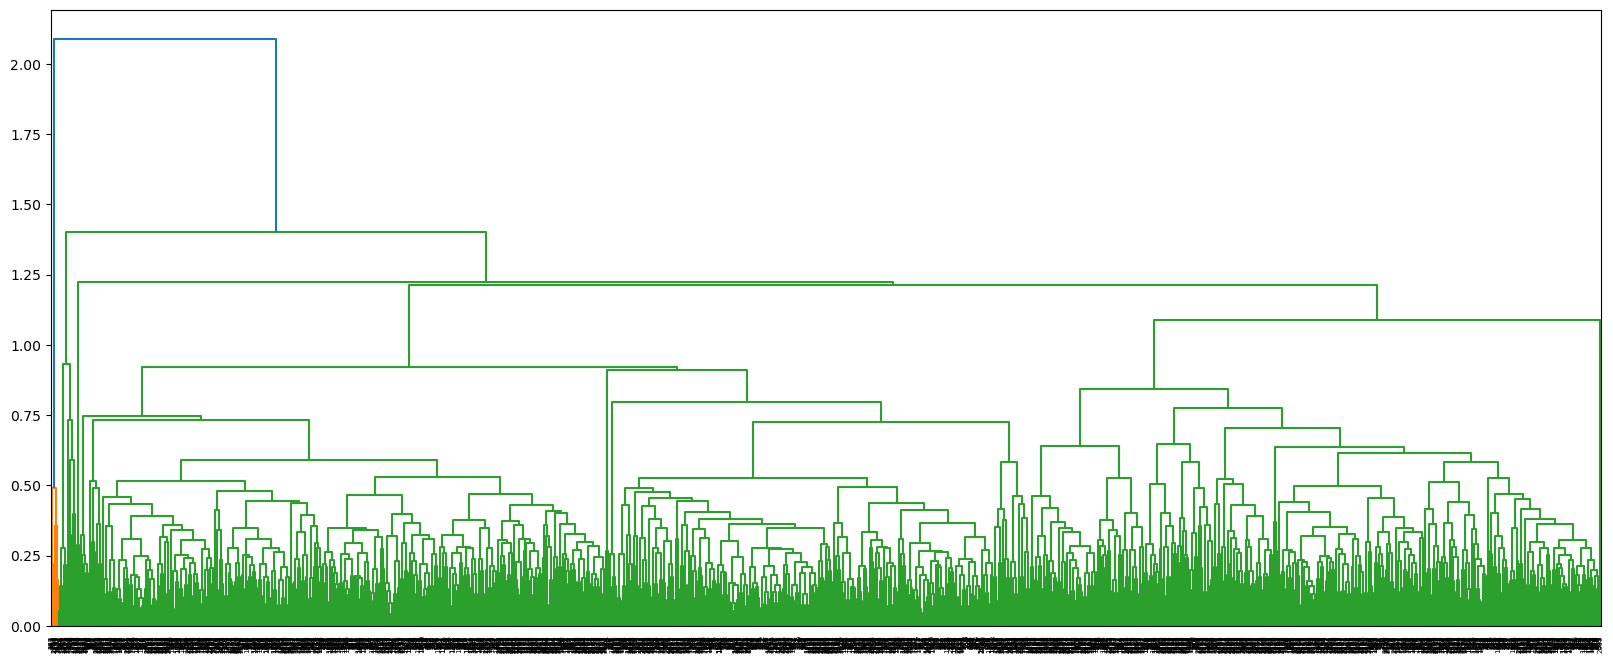

In [178]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method= 'average'))

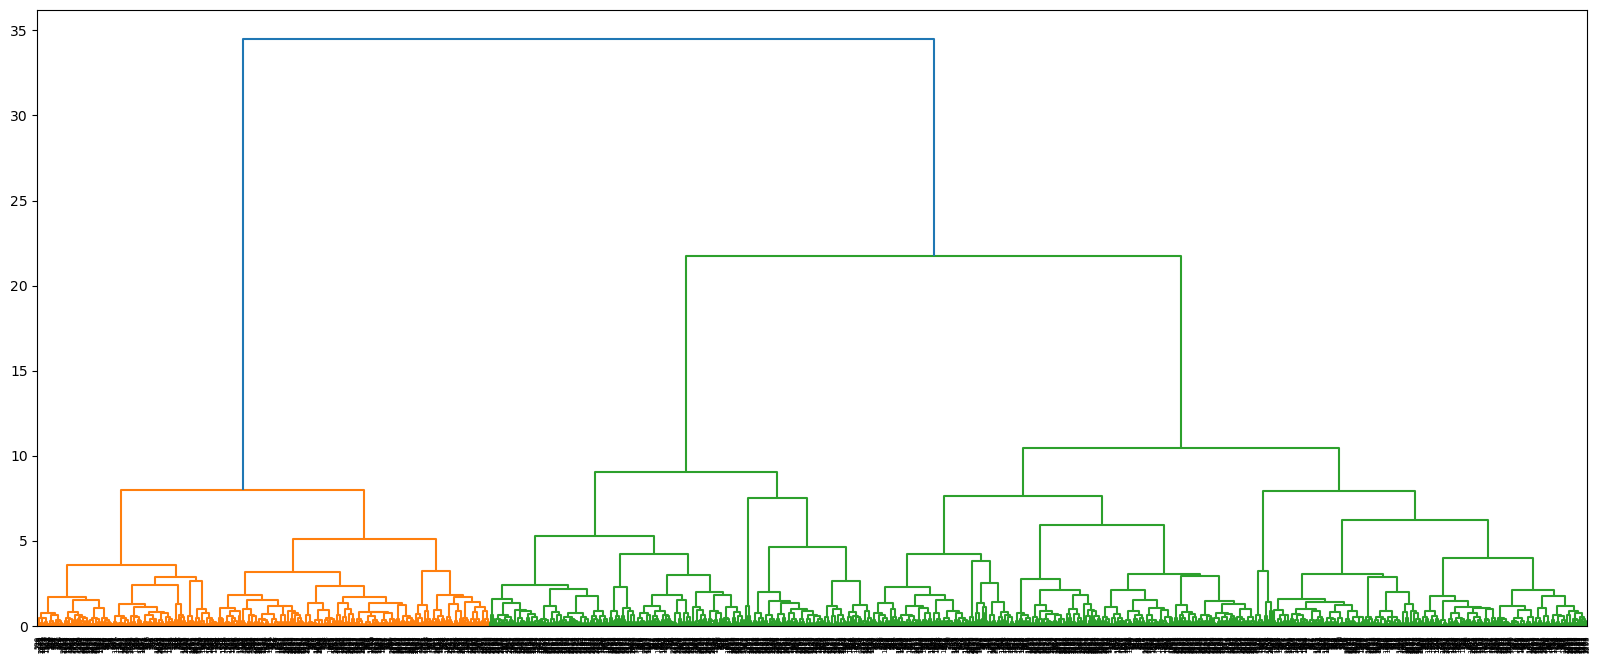

In [179]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method= 'ward'))

have 2 choices to make linkage and number of clusters

From the above dendrograms,anyone which looks very easy to read, we gonna take that in our model.

from the above dendrograms we gonna go with ward linkage (n = 5) because its looks simpler as compare to other dendrograms

The silhouette value is a measure of how similar an object is to it's own cluster (cohesion) compared to other cluster(separation).

The silhoutte ranges are from -1 to +1, where a high value indicates that the object is well matched to it's own cluster and poorly matched to neighboring clusters.

#### Silhouette Score 

In [180]:
from sklearn.metrics import silhouette_score as sil 

In [181]:
linkages = ['complete' , 'single' , 'ward' , 'average']

for i in range (2,8):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(df_pca)
        sil_score = sil(df_pca, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,2))
 

For n= 2 and linkage = complete Silhouette score is 0.39
For n= 2 and linkage = single Silhouette score is 0.53
For n= 2 and linkage = ward Silhouette score is 0.37
For n= 2 and linkage = average Silhouette score is 0.53
For n= 3 and linkage = complete Silhouette score is 0.4
For n= 3 and linkage = single Silhouette score is 0.22
For n= 3 and linkage = ward Silhouette score is 0.31
For n= 3 and linkage = average Silhouette score is 0.32
For n= 4 and linkage = complete Silhouette score is 0.4
For n= 4 and linkage = single Silhouette score is 0.23
For n= 4 and linkage = ward Silhouette score is 0.22
For n= 4 and linkage = average Silhouette score is 0.23
For n= 5 and linkage = complete Silhouette score is 0.31
For n= 5 and linkage = single Silhouette score is 0.1
For n= 5 and linkage = ward Silhouette score is 0.2
For n= 5 and linkage = average Silhouette score is 0.36
For n= 6 and linkage = complete Silhouette score is 0.22
For n= 6 and linkage = single Silhouette score is 0.09
For n= 6

Here, for n = 2 silhoutte score may be maximum but Silhouette coefficient might be negative resulting in samples getting assigned to the wrong cluster.

Complete Linkage (n = 5) also look simple to read. Lets take them both.

So We will stick to n = 5

#### Ward linkage and No. of Clusters = 5

In [182]:
hc=AgglomerativeClustering(n_clusters=5 , linkage='ward', affinity='euclidean')
y_hc=hc.fit_predict(df_pca)

In [183]:
df2 = df.copy()
df2['ClusterID'] = y_hc 

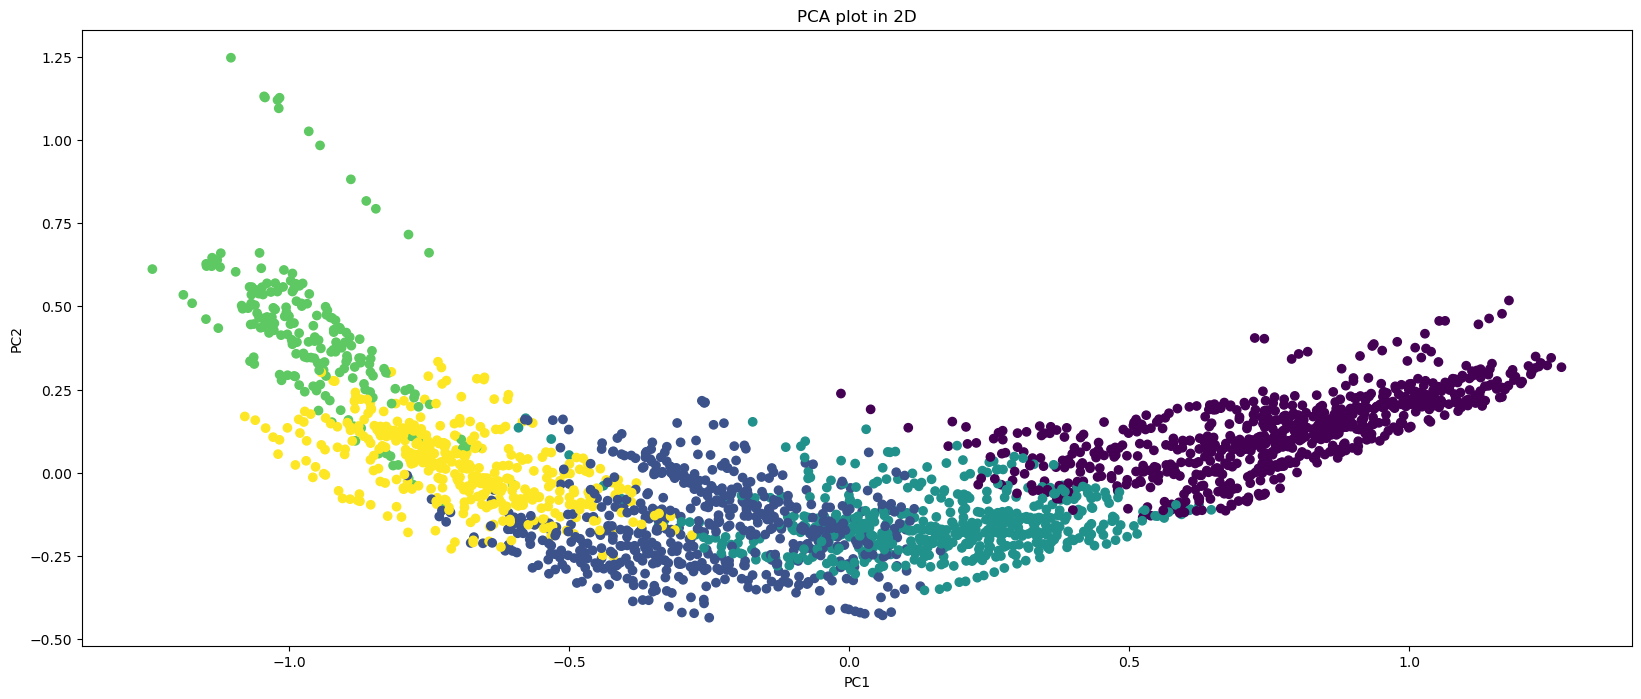

In [184]:
plt.figure(figsize=(20,8))
plt.scatter(df_pca.iloc[:,0] , df_pca.iloc[:,1], c = df2['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [185]:
#some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in df['Country'].unique():
    
    mode = df2[df2['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
df_cluster = pd.DataFrame()
df_cluster['Country'] = list
df_cluster['ClusterID'] = list1 

df_cluster = df_cluster.sort_values(by=['ClusterID'], ascending=True) 
df_cluster = df_cluster.reset_index()
df_cluster.drop(columns=['index'], inplace=True) 
df_cluster 

,Country,ClusterID
0,Sierra Leone,0
1,Mauritania,0
2,"Yemen, Rep.",0
3,Mozambique,0
4,Namibia,0
...,...,...
180,Malta,4
181,Lithuania,4
182,Latvia,4
183,Israel,4


#### Small Economies Countries

In [186]:
df_cluster[df_cluster['ClusterID']==0]

,Country,ClusterID
0,Sierra Leone,0
1,Mauritania,0
2,"Yemen, Rep.",0
3,Mozambique,0
4,Namibia,0
5,Niger,0
6,Nigeria,0
7,Rwanda,0
8,Sao Tome and Principe,0
9,Senegal,0


#### Small Economies Developing Countries

In [187]:
df_cluster[df_cluster['ClusterID']==1]

,Country,ClusterID
54,Qatar,1
55,Kuwait,1
56,Lebanon,1
57,Bosnia and Herzegovina,1
58,Turkey,1
59,Romania,1
60,Moldova,1
61,"Macedonia, FYR",1
62,Ukraine,1
63,Greece,1


#### Manufactering Countries and some underdeveloped countries

In [188]:
df_cluster[df_cluster['ClusterID']==2]

,Country,ClusterID
95,Fiji,2
96,Kiribati,2
97,India,2
98,Marshall Islands,2
99,"Micronesia, Fed. Sts.",2
100,Syrian Arab Republic,2
101,Solomon Islands,2
102,Tonga,2
103,Vanuatu,2
104,Kazakhstan,2


 #### Big Giants

In [189]:
df_cluster[df_cluster['ClusterID']==3]

,Country,ClusterID
137,Finland,3
138,United States,3
139,Japan,3
140,Germany,3
141,Iceland,3
142,Italy,3
143,Luxembourg,3
144,Netherlands,3
145,Norway,3
146,Denmark,3


#### European and Asian developed countries

In [190]:
df_cluster[df_cluster['ClusterID']==4]

,Country,ClusterID
155,United Arab Emirates,4
156,Estonia,4
157,Portugal,4
158,Cyprus,4
159,Croatia,4
160,Bulgaria,4
161,Belgium,4
162,"Macao SAR, China",4
163,Austria,4
164,Bahrain,4


In [191]:
country = input('Enter Name of Country:')

for i in range (0, len(df_cluster)):
    if df_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', df_cluster['ClusterID'][i]) 
        
        if df_cluster['ClusterID'][i] == 0 :
            print('Small Economies Countries')
        elif df_cluster['ClusterID'][i] == 1 :
            print('Small Economies Developing Countries')
        elif df_cluster['ClusterID'][i] == 2 :
            print('Manufactering Countries and some underdeveloped countries')
        elif df_cluster['ClusterID'][i] == 3 :
            print('Big Giants - Developed country with highest health standards')
        elif df_cluster['ClusterID'][i] == 4 :
            print('European and Asian developed countries')


Enter Name of Country:United Kingdom
United Kingdom Belongs To Cluster Number: 3
Big Giants - Developed country with highest health standards


#### Complete linkage and No. of clusters = 5

In [192]:
hc=AgglomerativeClustering(n_clusters=5 , linkage='complete', affinity='euclidean')
y_hc=hc.fit_predict(df_pca)

In [193]:
df1 = df.copy()
df1['ClusterID'] = y_hc 

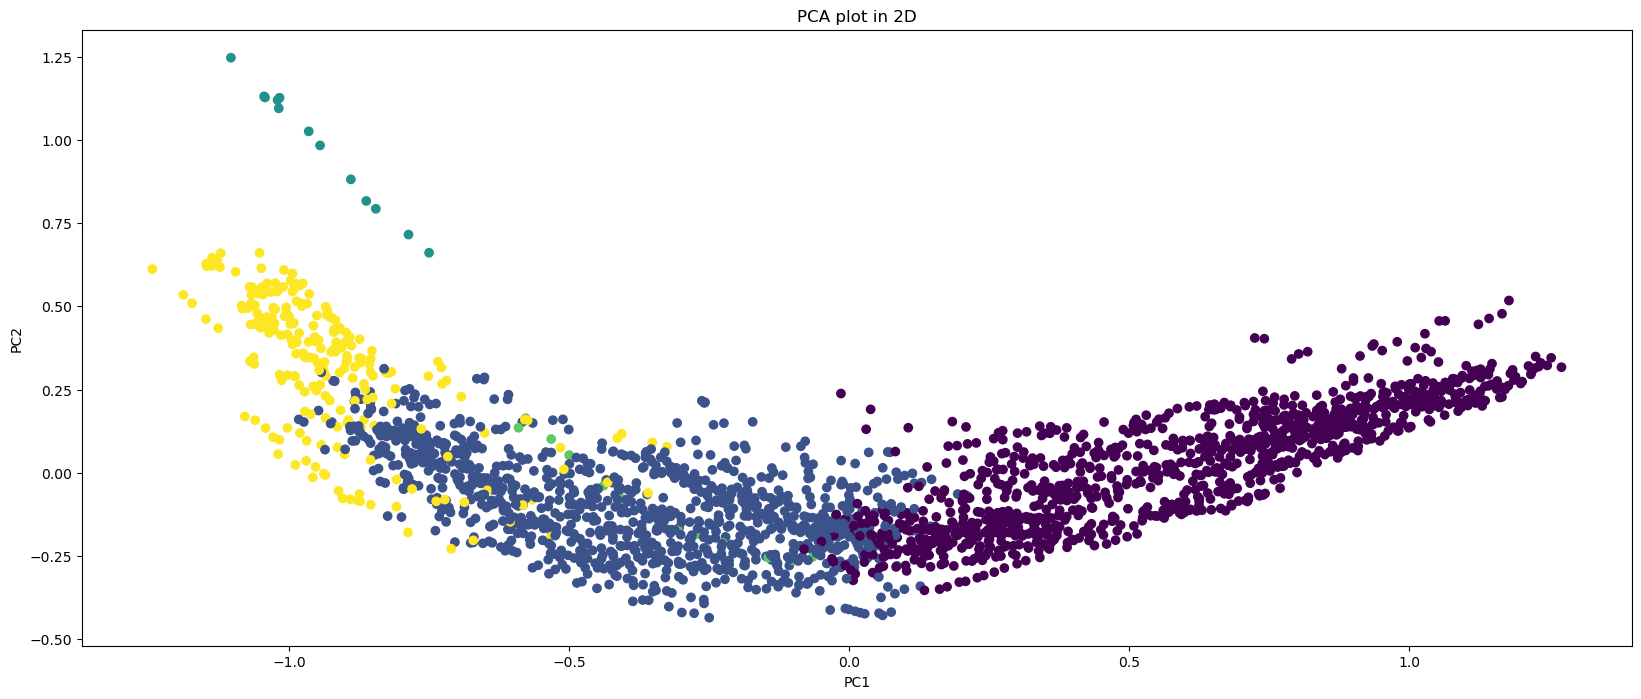

In [194]:
plt.figure(figsize=(20,8))
plt.scatter(df_pca.iloc[:,0] , df_pca.iloc[:,1], c = df1['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [195]:
#some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in df1['Country'].unique():
    
    mode = df1[df1['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
df_cluster = pd.DataFrame()
df_cluster['Country'] = list
df_cluster['ClusterID'] = list1 

df_cluster = df_cluster.sort_values(by=['ClusterID'], ascending=True) 
df_cluster = df_cluster.reset_index()
df_cluster.drop(columns=['index'], inplace=True) 
df_cluster 

,Country,ClusterID
0,Vanuatu,0
1,India,0
2,Nicaragua,0
3,Papua New Guinea,0
4,Cambodia,0
...,...,...
180,Ireland,4
181,Finland,4
182,Iceland,4
183,"Macao SAR, China",4


#### Under developed economy and Some Developing Countries as well with Lowest Health standards (mostlly african countries)

In [196]:
df_cluster[df_cluster['ClusterID']==0]

,Country,ClusterID
0,Vanuatu,0
1,India,0
2,Nicaragua,0
3,Papua New Guinea,0
4,Cambodia,0
...,...,...
79,Liberia,0
80,Lesotho,0
81,Kenya,0
82,Mauritania,0


#### Small Economies Developing Countries and Some Developed Countries as well

In [197]:
df_cluster[df_cluster['ClusterID']==1] 

,Country,ClusterID
84,Marshall Islands,1
85,New Zealand,1
86,Algeria,1
87,Qatar,1
88,Oman,1
...,...,...
158,Slovak Republic,1
159,Slovenia,1
160,Spain,1
161,Latvia,1


#### World Supremacy

In [198]:
df_cluster[df_cluster['ClusterID']==2] 

,Country,ClusterID
163,United States,2


#### Asian Rising Stars

In [199]:
df_cluster[df_cluster['ClusterID']==3] 

,Country,ClusterID
164,China,3


#### Developed countries with highest health standards

In [200]:
df_cluster[df_cluster['ClusterID']==4]

,Country,ClusterID
165,Japan,4
166,Germany,4
167,United Kingdom,4
168,"Hong Kong SAR, China",4
169,"Korea, Rep.",4
170,Netherlands,4
171,Norway,4
172,United Arab Emirates,4
173,Austria,4
174,Australia,4


Under developed economy and Some Developing Countries as well with Lowest Health standards (mostlly african countries)

In [201]:
country = input('Enter Name of Country:')

for i in range (0, len(df_cluster)):
    if df_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', df_cluster['ClusterID'][i]) 
        
        if df_cluster['ClusterID'][i] == 0 :
            print('Under developed economy and Some Developing Countries as well with Lowest Health standards (mostlly african countries)')
        elif df_cluster['ClusterID'][i] == 1 :
            print('Small Economies Developing Countries and Some Developed Countries as well')
        elif df_cluster['ClusterID'][i] == 2 :
            print('World Supremacy')
        elif df_cluster['ClusterID'][i] == 3 :
            print('Asian Rising Stars')
        elif df_cluster['ClusterID'][i] == 4 :
            print('Developed countries with highest health standards')


Enter Name of Country:China
China Belongs To Cluster Number: 3
Asian Rising Stars


### DBSCAN

In [202]:
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN

In [203]:
dbscan = DBSCAN(eps=0.5, min_samples=20) # min_samples > = no of columns
dbscan.fit(df_pca)
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

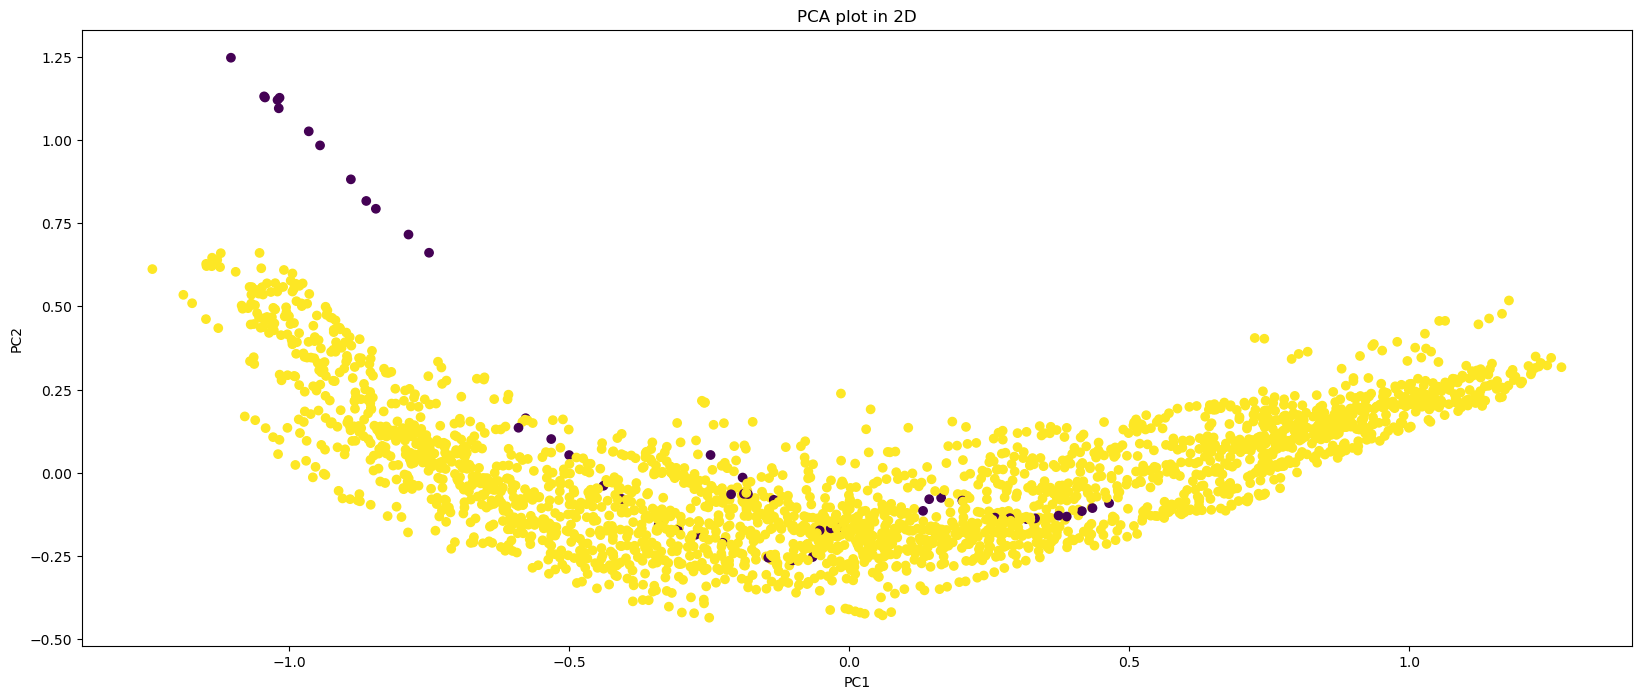

In [204]:
plt.figure(figsize=(20,8))
plt.scatter(df_pca.iloc[:,0] , df_pca.iloc[:,1], c = dbscan.labels_)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### KNN

In [205]:
df_knn = df2

In [206]:
df_knn = df_knn.drop(columns=['Country'])

In [207]:
df_knn_y = df2['ClusterID']
df_knn_y = df_knn_y.drop(columns='Country')

In [208]:
df_knn_x = df_knn.iloc[:,0:20]

In [209]:
df_knn_y

0       2
1       0
2       0
3       0
4       0
       ..
2400    1
2401    1
2402    3
2403    4
2404    1
Name: ClusterID, Length: 2405, dtype: int64

In [210]:
df[df['Country'] == 'United Kingdom'].head(1)

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
124,0.012,543662.0,United Kingdom,27.0,222940.0,1493628385535,0.07,1761,0.006,0.3,0.06,80.0,75.0,0.7,0.19,0.652,0.158,58892514,0.787,29978000000,47009000000


In [211]:
df_test = pd.DataFrame({'Birth Rate':0.012, 'CO2 Emissions':543662.0, 'Days to Start Business':27.0, 'Energy Usage':222940.0,
       'GDP':1493628385535, 'Health Exp % GDP':0.07, 'Health Exp/Capita':1761,
       'Infant Mortality Rate':0.006, 'Internet Usage':0.3, 'Lending Interest':0.06,
       'Life Expectancy Female':80.0, 'Life Expectancy Male':75.0, 'Mobile Phone Usage':0.7,
       'Population 0-14':0.19, 'Population 15-64':0.652, 'Population 65+':0.158,
       'Population Total':58892514, 'Population Urban':0.787, 'Tourism Inbound':29978000000,
       'Tourism Outbound':47009000000}, index=[0]) 
                      
df_test   

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.012,543662.0,27.0,222940.0,1493628385535,0.07,1761,0.006,0.3,0.06,80.0,75.0,0.7,0.19,0.652,0.158,58892514,0.787,29978000000,47009000000


In [212]:
df_test.shape

(1, 20)

In [213]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(df_knn_x , df_knn_y)
  
# Predict 
a = knn.predict(df_test)
if a==0:
    print('Asian Rising Stars')
elif a==1:
    print('small economies but developed')
elif a==2:
    print('Under developed')
elif a==3:
    print('World Supremacy')
elif a==4:
    print('European and asian developed countries')


World Supremacy


## <h1><center><font color=1E9199>Thank You</font></center></h1>